In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img1 = Image.open('/content/0-141.jpg')
img2 = Image.open('/content/0-40.jpg')

#mn= np.load('/content/images_test.npy')

In [ ]:
import random
img1_rot = []
angles = [90,180,270]
for i in range(3):
  #angle = random.uniform(0, 180)
  #angles.append(angle)
  #img = Image.fromarray(img1)
  new_img = img1.rotate(angles[i], fillcolor = 'black')
  img1_rot.append(np.asarray(new_img))
#train_resize_rotated = np.asarray(train_resize_rotated)

In [ ]:
import random
img2_rot = []
angles = [90,180,270]
for i in range(3):
  #angle = random.uniform(0, 180)
  #angles.append(angle)
  #img = Image.fromarray(img1)
  new_img = img2.rotate(angles[i], fillcolor = 'black')
  img2_rot.append(np.asarray(new_img))

In [ ]:
from PIL import Image

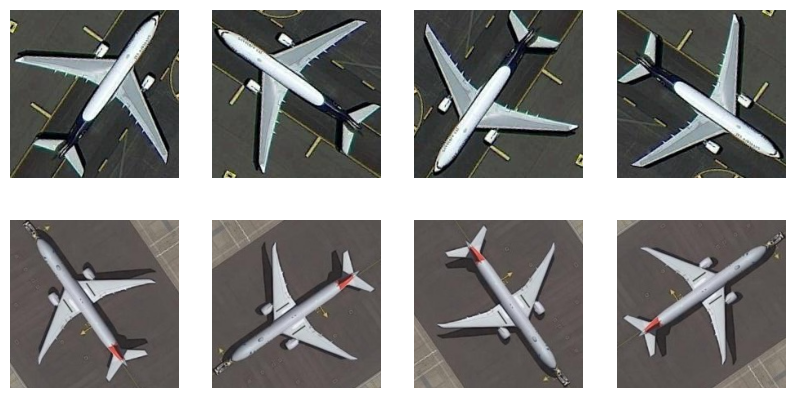

In [ ]:
fig, axs = plt.subplots(2, 4)
fig.set_figwidth(10)  # Sets overall figure width to 10 inches
fig.set_figheight(5)

#img = Image.fromarray(mn[0])
#new_img = img.rotate(60, fillcolor = 'black')
axs[0][0].imshow(img1)
axs[1][0].imshow(img2)
#img = Image.fromarray(mn[1])
#new_img = img.rotate(60, fillcolor = 'black')

axs[0][1].imshow(img1_rot[0])
axs[1][1].imshow(img2_rot[0])
#img = Image.fromarray(mn[9])
#new_img = img.rotate(120, fillcolor = 'black')

axs[0][2].imshow(img1_rot[1])
axs[1][2].imshow(img2_rot[1])
#img = Image.fromarray(mn[15])
#new_img = img.rotate(180, fillcolor = 'black')

axs[0][3].imshow(img1_rot[2])
axs[1][3].imshow(img2_rot[2])
#img = Image.fromarray(mn[4])
#new_img = img.rotate(240, fillcolor = 'black')

#axs[4].imshow(img)

for ax in axs.flat:
    ax.axis('off')

In [ ]:
mn = np.load('/content/images_test.npy')

In [ ]:
import random
train_resize_rotated = []
angles = []
for i in range(len(train_resize)):
  angle = random.uniform(0, 180)
  angles.append(angle)
  img = Image.fromarray(train_resize[i])
  new_img = img.rotate(angle, fillcolor = 'black')
  train_resize_rotated.append(np.asarray(new_img))
train_resize_rotated = np.asarray(train_resize_rotated)

In [ ]:
!unzip sunspot_dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: sunspot_dataset/201306010318_164.npz  
  inflating: sunspot_dataset/201306010318_165.npz  
  inflating: sunspot_dataset/201306020342_157.npz  
  inflating: sunspot_dataset/201306020342_164.npz  
  inflating: sunspot_dataset/201306020342_165.npz  
  inflating: sunspot_dataset/201306020342_166.npz  
  inflating: sunspot_dataset/201306020342_167.npz  
  inflating: sunspot_dataset/201306030327_157.npz  
  inflating: sunspot_dataset/201306030327_162.npz  
  inflating: sunspot_dataset/201306030327_164.npz  
  inflating: sunspot_dataset/201306030327_165.npz  
  inflating: sunspot_dataset/201306030327_166.npz  
  inflating: sunspot_dataset/201306030327_167.npz  
  inflating: sunspot_dataset/201306040413_165.npz  
  inflating: sunspot_dataset/201306040413_166.npz  
  inflating: sunspot_dataset/201306040413_167.npz  
  inflating: sunspot_dataset/201306050327_165.npz  
  inflating: sunspot_dataset/201306050327_166.np

In [ ]:
pip install e2cnn

In [ ]:
#@title read sunspots
"""Index classes."""
import re
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import dateutil.parser as dparser
try:
    from sunpy.coordinates.sun import carrington_rotation_number, L0, B0
except ImportError:
    pass

class BaseIndex(pd.DataFrame): #pylint: disable=abstract-method
    """Base index class."""

    @property
    def _constructor(self):
        return self.__class__

    @property
    def indices(self):
        """Unique indices."""
        return self.index.unique().values

    def train_test_split(self, train_ratio=0.8, shuffle=True, seed=None):
        """Splits index into train and test subsets.
        Parameters
        ----------
        train_ratio : float, in [0, 1]
            Ratio of the train subset to the whole dataset. Default to 0.8.
        shuffle : bool
            If True, index will be shuffled before splitting into train and test.
            Default to True.
        seed : int
            Seed for the random number generator.
        Returns
        -------
        train, test : BaseIndexer
            Train and test indices.
        """
        indices = self.index.unique().values
        if shuffle:
            np.random.seed(seed)
            np.random.shuffle(indices)
        train_size = int(train_ratio * len(indices))
        train = self.loc[indices[:train_size]]
        test = self.loc[indices[train_size:]]
        return train, test

    def shuffle(self, seed=None):
        """Randomly shuffle indices.
        Parameters
        ----------
        seed : int
            Seed for the random number generator.
        Returns
        -------
        index : BaseIndex
            BaseIndex with shuffled indices.
        """
        indices = self.index.unique().values
        np.random.seed(seed)
        np.random.shuffle(indices)
        return self.loc[indices]

    def index_merge(self, x):
        """Merge on left and right indexes."""
        return self.merge(x, left_index=True, right_index=True)


class FilesIndex(BaseIndex): #pylint: disable=abstract-method,too-many-ancestors
    """Index of files.
    Builds a DataFrame containing path to files in columns. By default
    the DataFrame is indexed by filnames.
    Paramerers
    ----------
    kwargs : dict of type {name: path}
        Path to files that should be indexed and reference name for files collection.
        Path can contain shell-style wildcards.
    """
    def __init__(self, *args, **kwargs):
        if not kwargs:
            super().__init__(*args, **kwargs)
        elif len(kwargs) > 1:
            raise ValueError('Only a single keyword in allowed, got {}'.format(len(kwargs)))
        else:
            name, path = next(iter(kwargs.items()))
            files = glob.glob(path)
            index = pd.Index([Path(f).stem for f in files], name=self.__class__.__name__)
            super().__init__({name: files}, index=index)

    def parse_datetime(self, regex=None):
        """Extract date and time from index.
        Parameters
        ----------
        regex : str, optional
            Datetime pattern to search in index.
        Returns
        -------
        index : FilesIndex
            FilesIndex with a column DateTime added.
        """
        if regex is None:
            dt = [dparser.parse(i, fuzzy=True) for i in self.index]
        else:
            dt = [dparser.parse(re.search(regex, i).group(0), fuzzy=True) for i in self.index]
        self['DateTime'] = dt
        return self

    def get_sun_params(self):
        """"Get L0, B0 and carrington rotation number corresponding to DateTime column.
        Returns
        -------
        index : FilesIndex
            FilesIndex with columns L0, B0, CR added.
        """
        t = self['DateTime']
        self['L0'] = L0(t)
        self['B0'] = B0(t)
        self['CR'] = carrington_rotation_number(t).astype(int)
        return self

In [ ]:
index = FilesIndex(img='../content/sunspot_dataset/*.npz').sort_index()

In [ ]:
def transform_channels(arr):
    out = (arr[..., 0] | arr[..., 1]).astype(np.float32)
    out[arr[..., 2]] = 1
    return np.expand_dims(out, 0) #/ 2 #normalize to [0, 1]

In [ ]:
from scipy import sparse
train_sun = []
for i in range(len(index)):
  f = sparse.load_npz(index.img[i]).toarray().reshape(256, 256, 3)
  f = transform_channels(f)
  train_sun.append(f)

In [ ]:
index.img[0]

'../content/sunspot_dataset/201007230452_63.npz'

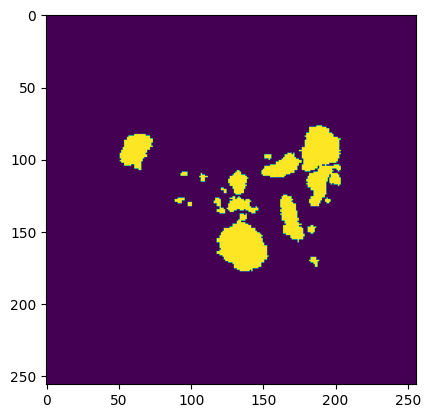

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_sun[0].reshape(256,256))

In [ ]:
import numpy as np

train_sun = np.asarray(train_sun)


In [ ]:
np.unique(train_sun[0])

array([0., 1.], dtype=float32)

In [ ]:
from PIL import Image
train_resize = []
for i in range(len(train_sun)):
  img = Image.fromarray(train_sun.reshape((8498,256, 256))[i])
  new_img = img.resize((128,128), resample=Image.NEAREST)
  train_resize.append(np.asarray(new_img))
train_resize = np.asarray(train_resize)

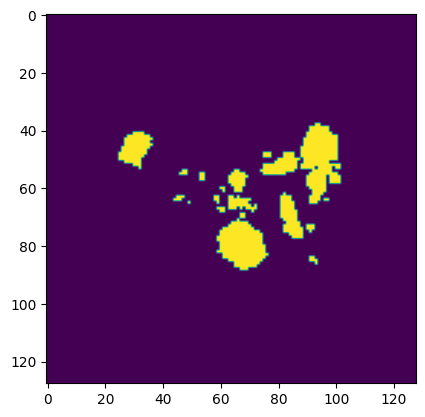

In [ ]:
plt.imshow(train_resize[0])

In [ ]:
train_resize.shape

(8498, 128, 128)

add rotated images

In [ ]:
import random
train_resize_rotated = []
angles = []
for i in range(len(train_resize)):
  angle = random.uniform(0, 180)
  angles.append(angle)
  img = Image.fromarray(train_resize[i])
  new_img = img.rotate(angle, fillcolor = 'black')
  train_resize_rotated.append(np.asarray(new_img))
train_resize_rotated = np.asarray(train_resize_rotated)

In [ ]:
train_sun = np.concatenate((train_resize,train_resize_rotated), axis = 0)

In [ ]:
train_sun = train_resize

In [ ]:
train_sun.shape

In [ ]:
#@title eval and train
from __future__ import print_function, division

import numpy as np
import sys

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data
import torchvision
from torch.distributions.normal import Normal
from torch.distributions.kl import kl_divergence
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import src.models as models
from src.utils import EarlyStopping

import datetime
import os
import shutil




def eval_minibatch(x, y, generator_model, encoder_model, t_inf, r_inf, epoch, device
                  , theta_prior, groupconv, image_dim, beta):

    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)

    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        y = y.view(b, -1)

        z_mu,z_logstd = encoder_model(y)
        z_std = torch.exp(z_logstd)
        z_dim = z_mu.size(1)

        # draw samples from variational posterior to calculate E[p(x|z)]
        r = Variable(x.data.new(b,z_dim).normal_())
        z = z_std*r + z_mu

        kl_div = 0
        # z[0] is the rotation
        theta_mu = z_mu[:,0]
        theta_std = z_std[:,0]
        theta_logstd = z_logstd[:,0]
        theta = z[:,0]
        z = z[:,1:]
        z_mu = z_mu[:,1:]
        z_std = z_std[:,1:]
        z_logstd = z_logstd[:,1:]

        # calculate the KL divergence term
        sigma = theta_prior
        kl_div = -theta_logstd + np.log(sigma) + (theta_std**2 + theta_mu**2)/2/sigma**2 - 0.5

        # z[0,1] are the translations
        dx_scale = 0.1
        dx_mu = z_mu[:,:2]
        dx_std = z_std[:,:2]
        dx_logstd = z_logstd[:,:2]
        dx = z[:,:2]*dx_scale # scale dx by standard deviation
        dx = dx.unsqueeze(1)
        z = z[:,2:]

        x = x - dx # translate coordinates

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        # unit normal prior over z and translation
        z_kl = -z_logstd + 0.5*z_std**2 + 0.5*z_mu**2 - 0.5
        kl_div = kl_div + torch.sum(z_kl, 1)
        kl_div = kl_div.mean()


    elif t_inf == 'attention' and r_inf == 'unimodal':
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, attn_sampled, theta_vals, z_vals = encoder_model(y, device)

        #attn_sampled returned here is over the locations since r_inf is unimodal
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps

        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps

        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)

        #theta sampled from N(theta_mu, theta_std)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)



        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        q_t = F.log_softmax(attn.view(b, -1), dim=1).view(b, attn.shape[2], attn.shape[3]) # B x R x H x W

        z_mu = z_mu.view(b, z_dim, attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[2], attn.shape[3])
        q_t_temp = q_t.unsqueeze(1).expand(b, z_dim, attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_temp) == 0, torch.zeros_like(q_t_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_temp) == 0, torch.ones_like(q_t_temp), z_std)
        q_z_given_t = Normal(z_mu, z_std)

        theta_mu = theta_mu.view(b, attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t) == 0, torch.zeros_like(q_t), theta_mu)
        theta_std = torch.where(torch.exp(q_t) == 0, torch.ones_like(q_t), theta_std)
        q_theta_given_t = Normal(theta_mu, theta_std)



        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0)
        p_t = F.log_softmax(p_t.view(-1), dim=0).view(1, attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t)*(q_t - p_t)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t, prior_z).sum(1)

        prior_theta_given_t = Normal(torch.tensor([0.0]).to(device), torch.tensor([theta_prior]).to(device))
        kl_theta = kl_divergence(q_theta_given_t, prior_theta_given_t)

        val2 = (torch.exp(q_t) * (kl_theta + kl_z)).view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()


    else:
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, q_t_r, p_r, attn_sampled, offsets, theta_vals, z_vals = encoder_model(y, device)

        attn_sampled_over_locs = torch.sum(attn_sampled, dim=1).view(attn_sampled.shape[0], -1, 1)
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)

        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]

        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps
        z_mu_expected = torch.bmm(z_mu, attn_sampled)

        z_std_expected = torch.bmm(z_std, attn_sampled)

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled_over_locs).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps
        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)

        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        z_mu = z_mu.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        q_t_r_temp = q_t_r.unsqueeze(1).expand(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_r_temp) == 0, torch.zeros_like(q_t_r_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_r_temp) == 0, torch.ones_like(q_t_r_temp), z_std)
        q_z_given_t_r = Normal(z_mu, z_std) # B x z_dim x R x HW

        theta_mu = theta_mu.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t_r) == 0, torch.zeros_like(q_t_r), theta_mu)
        theta_std = torch.where(torch.exp(q_t_r) == 0, torch.ones_like(q_t_r), theta_std)
        q_theta_given_t_r = Normal(theta_mu, theta_std)

        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0).unsqueeze(1)

        p_t_r = p_t + p_r.unsqueeze(0)
        p_t_r = F.log_softmax(p_t_r.view(-1), dim=0).view(1, attn.shape[1], attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t_r)*(q_t_r - p_t_r)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t_r, prior_z).sum(1)

        if groupconv >= 1:
            theta_prior_given_r = np.pi/groupconv
        else:
            theta_prior_given_r = theta_prior

        p_theta_given_t_r = Normal(offsets.unsqueeze(1).unsqueeze(2).to(device),
                                   torch.tensor([theta_prior_given_r]*attn.shape[1]).unsqueeze(1).unsqueeze(2).to(device))
        kl_theta = kl_divergence(q_theta_given_t_r, p_theta_given_t_r)

        val2 = torch.exp(q_t_r) * (kl_theta + kl_z)
        val2 = val2.view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = beta*kl_div.mean()



    # reconstruct
    y_hat = generator_model(x.contiguous(), z)
    y_hat = y_hat.view(b, -1)
    y = y.view(b, -1)
    size = y.size(1)
    log_p_x_g_z = -F.binary_cross_entropy_with_logits(y_hat, y)*size
    elbo = log_p_x_g_z - kl_div

    return elbo, log_p_x_g_z, kl_div





def train_epoch(iterator, x_coord, generator_model, encoder_model, optim, t_inf, r_inf
                , epoch, num_epochs, N, device, params, theta_prior, groupconv, image_dim, beta):

    generator_model.train()
    encoder_model.train()

    params = list(generator_model.parameters()) + list(encoder_model.parameters())

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0

    for y, in iterator:
        b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)

        elbo, log_p_x_g_z, kl_div= eval_minibatch(x, y, generator_model, encoder_model, t_inf,
                            r_inf, epoch, device, theta_prior, groupconv, image_dim, beta)


        loss = -elbo
        #optim.zero_grad() #added
        loss.backward()
        nn.utils.clip_grad_value_(params, 1.)
        optim.step()
        optim.zero_grad()

        elbo = elbo.item()
        gen_loss = -log_p_x_g_z.item()
        kl_loss = kl_div.item()


        c += b
        delta = b*(gen_loss - gen_loss_accum)
        gen_loss_accum += delta/c

        delta = b*(elbo - elbo_accum)
        elbo_accum += delta/c

        delta = b*(kl_loss - kl_loss_accum)
        kl_loss_accum += delta/c




        template = '# [{}/{}] training {:.1%}, ELBO={:.5f}, Error={:.5f}, KL={:.5f}'
        line = template.format(epoch+1, num_epochs, c/N, elbo_accum, gen_loss_accum
                              , kl_loss_accum)
        print(line, end='\r', file=sys.stderr)

    print(' '*150, end='\r', file=sys.stderr)
    return elbo_accum, gen_loss_accum, kl_loss_accum





def eval_model(iterator, x_coord, generator_model, encoder_model, t_inf , r_inf, epoch
               , device, theta_prior, groupconv, image_dim, beta):

    generator_model.eval()
    encoder_model.eval()

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0

    with torch.no_grad():
        for y, in iterator:
            b = y.size(0)
            x = Variable(x_coord)
            y = Variable(y)

            elbo, log_p_x_g_z, kl_div = eval_minibatch(x, y, generator_model, encoder_model, t_inf
                                                       , r_inf, epoch, device, theta_prior
                                                       , groupconv,image_dim, beta)

            elbo = elbo.item()
            gen_loss = -log_p_x_g_z.item()
            kl_loss = kl_div.item()


            c += b
            delta = b*(gen_loss - gen_loss_accum)
            gen_loss_accum += delta/c

            delta = b*(elbo - elbo_accum)
            elbo_accum += delta/c

            delta = b*(kl_loss - kl_loss_accum)
            kl_loss_accum += delta/c




    return elbo_accum, gen_loss_accum, kl_loss_accum



In [ ]:
#@title reconstruct y
def y_hat_eval_minibatch(x, y, generator_model, encoder_model, t_inf, r_inf, device
                  , theta_prior, groupconv, image_dim):

    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)

    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        y = y.view(b, -1)

        z_mu,z_logstd = encoder_model(y)
        z_std = torch.exp(z_logstd)
        z_dim = z_mu.size(1)

        # draw samples from variational posterior to calculate E[p(x|z)]
        r = Variable(x.data.new(b,z_dim).normal_())
        z = z_std*r + z_mu

        kl_div = 0
        # z[0] is the rotation
        theta_mu = z_mu[:,0]
        theta_std = z_std[:,0]
        theta_logstd = z_logstd[:,0]
        theta = z[:,0]
        z = z[:,1:]
        z_mu = z_mu[:,1:]
        z_std = z_std[:,1:]
        z_logstd = z_logstd[:,1:]

        # calculate the KL divergence term
        sigma = theta_prior
        kl_div = -theta_logstd + np.log(sigma) + (theta_std**2 + theta_mu**2)/2/sigma**2 - 0.5

        # z[0,1] are the translations
        dx_scale = 0.1
        dx_mu = z_mu[:,:2]
        dx_std = z_std[:,:2]
        dx_logstd = z_logstd[:,:2]
        dx = z[:,:2]*dx_scale # scale dx by standard deviation
        dx = dx.unsqueeze(1)
        z = z[:,2:]

        x = x - dx # translate coordinates

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        # unit normal prior over z and translation
        z_kl = -z_logstd + 0.5*z_std**2 + 0.5*z_mu**2 - 0.5
        kl_div = kl_div + torch.sum(z_kl, 1)
        kl_div = kl_div.mean()


    elif t_inf == 'attention' and r_inf == 'unimodal':
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, attn_sampled, theta_vals, z_vals = encoder_model(y, device)

        #attn_sampled returned here is over the locations since r_inf is unimodal
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps

        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps

        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)

        #theta sampled from N(theta_mu, theta_std)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)



        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        q_t = F.log_softmax(attn.view(b, -1), dim=1).view(b, attn.shape[2], attn.shape[3]) # B x R x H x W

        z_mu = z_mu.view(b, z_dim, attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[2], attn.shape[3])
        q_t_temp = q_t.unsqueeze(1).expand(b, z_dim, attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_temp) == 0, torch.zeros_like(q_t_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_temp) == 0, torch.ones_like(q_t_temp), z_std)
        q_z_given_t = Normal(z_mu, z_std)

        theta_mu = theta_mu.view(b, attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t) == 0, torch.zeros_like(q_t), theta_mu)
        theta_std = torch.where(torch.exp(q_t) == 0, torch.ones_like(q_t), theta_std)
        q_theta_given_t = Normal(theta_mu, theta_std)



        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0)
        p_t = F.log_softmax(p_t.view(-1), dim=0).view(1, attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t)*(q_t - p_t)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t, prior_z).sum(1)

        prior_theta_given_t = Normal(torch.tensor([0.0]).to(device), torch.tensor([theta_prior]).to(device))
        kl_theta = kl_divergence(q_theta_given_t, prior_theta_given_t)

        val2 = (torch.exp(q_t) * (kl_theta + kl_z)).view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()


    else:
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, q_t_r, p_r, attn_sampled, offsets, theta_vals, z_vals = encoder_model(y, device)

        attn_sampled_over_locs = torch.sum(attn_sampled, dim=1).view(attn_sampled.shape[0], -1, 1)
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps
        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)
        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled_over_locs).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps
        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        z_mu = z_mu.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        q_t_r_temp = q_t_r.unsqueeze(1).expand(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_r_temp) == 0, torch.zeros_like(q_t_r_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_r_temp) == 0, torch.ones_like(q_t_r_temp), z_std)
        q_z_given_t_r = Normal(z_mu, z_std) # B x z_dim x R x HW

        theta_mu = theta_mu.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t_r) == 0, torch.zeros_like(q_t_r), theta_mu)
        theta_std = torch.where(torch.exp(q_t_r) == 0, torch.ones_like(q_t_r), theta_std)
        q_theta_given_t_r = Normal(theta_mu, theta_std)

        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0).unsqueeze(1)

        p_t_r = p_t + p_r.unsqueeze(0)
        p_t_r = F.log_softmax(p_t_r.view(-1), dim=0).view(1, attn.shape[1], attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t_r)*(q_t_r - p_t_r)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t_r, prior_z).sum(1)

        if groupconv >= 1:
            theta_prior_given_r = np.pi/groupconv
        else:
            theta_prior_given_r = theta_prior

        p_theta_given_t_r = Normal(offsets.unsqueeze(1).unsqueeze(2).to(device),
                                   torch.tensor([theta_prior_given_r]*attn.shape[1]).unsqueeze(1).unsqueeze(2).to(device))
        kl_theta = kl_divergence(q_theta_given_t_r, p_theta_given_t_r)

        val2 = torch.exp(q_t_r) * (kl_theta + kl_z)
        val2 = val2.view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()



    # reconstruct
    y_hat = generator_model(x.contiguous(), z)
    y_hat = y_hat.view(b, -1)
    y = y.view(b, -1)
    size = y.size(1)
    log_p_x_g_z = -F.binary_cross_entropy_with_logits(y_hat, y)*size
    elbo = log_p_x_g_z - kl_div

    return elbo, log_p_x_g_z, kl_div, y_hat

In [ ]:
#@title reconstruct y with no rotate
def y_hat_eval_minibatch_zero(x, y, generator_model, encoder_model, t_inf, r_inf, device
                  , theta_prior, groupconv, image_dim):

    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)

    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        y = y.view(b, -1)

        z_mu,z_logstd = encoder_model(y)
        z_std = torch.exp(z_logstd)
        z_dim = z_mu.size(1)

        # draw samples from variational posterior to calculate E[p(x|z)]
        r = Variable(x.data.new(b,z_dim).normal_())
        z = z_std*r + z_mu

        kl_div = 0
        # z[0] is the rotation
        theta_mu = z_mu[:,0]
        theta_std = z_std[:,0]
        theta_logstd = z_logstd[:,0]
        theta = z[:,0]
        z = z[:,1:]
        z_mu = z_mu[:,1:]
        z_std = z_std[:,1:]
        z_logstd = z_logstd[:,1:]

        # calculate the KL divergence term
        sigma = theta_prior
        kl_div = -theta_logstd + np.log(sigma) + (theta_std**2 + theta_mu**2)/2/sigma**2 - 0.5

        # z[0,1] are the translations
        dx_scale = 0.1
        dx_mu = z_mu[:,:2]
        dx_std = z_std[:,:2]
        dx_logstd = z_logstd[:,:2]
        dx = z[:,:2]*dx_scale # scale dx by standard deviation
        dx = dx.unsqueeze(1)
        z = z[:,2:]

        x = x - dx # translate coordinates

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        # unit normal prior over z and translation
        z_kl = -z_logstd + 0.5*z_std**2 + 0.5*z_mu**2 - 0.5
        kl_div = kl_div + torch.sum(z_kl, 1)
        kl_div = kl_div.mean()


    elif t_inf == 'attention' and r_inf == 'unimodal':
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, attn_sampled, theta_vals, z_vals = encoder_model(y, device)

        #attn_sampled returned here is over the locations since r_inf is unimodal
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps

        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled).squeeze(2).unsqueeze(1)
        x = x - 0 # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps

        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)

        #theta sampled from N(theta_mu, theta_std)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)



        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        q_t = F.log_softmax(attn.view(b, -1), dim=1).view(b, attn.shape[2], attn.shape[3]) # B x R x H x W

        z_mu = z_mu.view(b, z_dim, attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[2], attn.shape[3])
        q_t_temp = q_t.unsqueeze(1).expand(b, z_dim, attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_temp) == 0, torch.zeros_like(q_t_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_temp) == 0, torch.ones_like(q_t_temp), z_std)
        q_z_given_t = Normal(z_mu, z_std)

        theta_mu = theta_mu.view(b, attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t) == 0, torch.zeros_like(q_t), theta_mu)
        theta_std = torch.where(torch.exp(q_t) == 0, torch.ones_like(q_t), theta_std)
        q_theta_given_t = Normal(theta_mu, theta_std)



        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0)
        p_t = F.log_softmax(p_t.view(-1), dim=0).view(1, attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t)*(q_t - p_t)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t, prior_z).sum(1)

        prior_theta_given_t = Normal(torch.tensor([0.0]).to(device), torch.tensor([theta_prior]).to(device))
        kl_theta = kl_divergence(q_theta_given_t, prior_theta_given_t)

        val2 = (torch.exp(q_t) * (kl_theta + kl_z)).view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()


    else:
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, q_t_r, p_r, attn_sampled, offsets, theta_vals, z_vals = encoder_model(y, device)
        #theta_vals = torch.zeros(theta_vals.shape[0], theta_vals.shape[1]).to(device)

        attn_sampled_over_locs = torch.sum(attn_sampled, dim=1).view(attn_sampled.shape[0], -1, 1)
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)



        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]

        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps
        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)
        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)


        attn_dim = attn.shape[3]
        print(attn_dim)
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled_over_locs).squeeze(2).unsqueeze(1)
        x = x #- dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps
        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)

        theta = torch.zeros(theta.shape[0]).to(device)#

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        z_mu = z_mu.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        q_t_r_temp = q_t_r.unsqueeze(1).expand(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_r_temp) == 0, torch.zeros_like(q_t_r_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_r_temp) == 0, torch.ones_like(q_t_r_temp), z_std)
        q_z_given_t_r = Normal(z_mu, z_std) # B x z_dim x R x HW

        theta_mu = theta_mu.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t_r) == 0, torch.zeros_like(q_t_r), theta_mu)
        theta_std = torch.where(torch.exp(q_t_r) == 0, torch.ones_like(q_t_r), theta_std)
        q_theta_given_t_r = Normal(theta_mu, theta_std)

        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0).unsqueeze(1)

        p_t_r = p_t + p_r.unsqueeze(0)
        p_t_r = F.log_softmax(p_t_r.view(-1), dim=0).view(1, attn.shape[1], attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t_r)*(q_t_r - p_t_r)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t_r, prior_z).sum(1)

        if groupconv >= 1:
            theta_prior_given_r = np.pi/groupconv
        else:
            theta_prior_given_r = theta_prior

        p_theta_given_t_r = Normal(offsets.unsqueeze(1).unsqueeze(2).to(device),
                                   torch.tensor([theta_prior_given_r]*attn.shape[1]).unsqueeze(1).unsqueeze(2).to(device))
        kl_theta = kl_divergence(q_theta_given_t_r, p_theta_given_t_r)

        val2 = torch.exp(q_t_r) * (kl_theta + kl_z)
        val2 = val2.view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()



    # reconstruct
    y_hat = generator_model(x.contiguous(), z)
    y_hat = y_hat.view(b, -1)
    y = y.view(b, -1)
    size = y.size(1)
    log_p_x_g_z = -F.binary_cross_entropy_with_logits(y_hat, y)*size
    elbo = log_p_x_g_z - kl_div

    return elbo, log_p_x_g_z, kl_div, y_hat

In [ ]:
def reconstruct_no_rot_no_tr(x,y, z_vals, generator_model, device
                  ):

        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        b = y.size(0)
        btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
        x = x.expand(b, x.size(0), x.size(1)).to(device)

        y = y.to(device)


        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim]

        z_std = z_vals[:, z_dim:]

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).squeeze(2).to(device)
        z = (z_std.to(device)*r_z + z_mu.to(device))

        theta = torch.zeros(b).to(device)#

        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        # reconstruct
        y_hat = generator_model(x.contiguous(), z)
        y_hat = y_hat.view(b, -1)

        return y_hat

In [ ]:
#@title reconstruct y
def y_hat_eval_model(iterator, x_coord, generator_model, encoder_model, t_inf , r_inf,
              device, theta_prior, groupconv, image_dim):

    generator_model.eval()
    encoder_model.eval()

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0

    with torch.no_grad():
        for y, in iterator:
            b = y.size(0)
            x = Variable(x_coord)
            y = Variable(y)

            elbo, log_p_x_g_z, kl_div, y_hat = y_hat_eval_minibatch(x, y, generator_model, encoder_model, t_inf
                                                       , r_inf, device, theta_prior
                                                       , groupconv,image_dim)

            elbo = elbo.item()
            gen_loss = -log_p_x_g_z.item()
            kl_loss = kl_div.item()

            c += b
            delta = b*(gen_loss - gen_loss_accum)
            gen_loss_accum += delta/c

            delta = b*(elbo - elbo_accum)
            elbo_accum += delta/c

            delta = b*(kl_loss - kl_loss_accum)
            kl_loss_accum += delta/c

    return elbo_accum, gen_loss_accum, kl_loss_accum, y_hat

In [ ]:
#@title reconstruct y with no rotate
def y_hat_eval_model_zero(iterator, x_coord, generator_model, encoder_model, t_inf , r_inf,
              device, theta_prior, groupconv, image_dim):

    generator_model.eval()
    encoder_model.eval()

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0

    with torch.no_grad():
        for y, in iterator:
            b = y.size(0)
            x = Variable(x_coord)
            y = Variable(y)

            elbo, log_p_x_g_z, kl_div, y_hat = y_hat_eval_minibatch_zero(x, y, generator_model, encoder_model, t_inf
                                                       , r_inf, device, theta_prior
                                                       , groupconv,image_dim)

            elbo = elbo.item()
            gen_loss = -log_p_x_g_z.item()
            kl_loss = kl_div.item()

            c += b
            delta = b*(gen_loss - gen_loss_accum)
            gen_loss_accum += delta/c

            delta = b*(elbo - elbo_accum)
            elbo_accum += delta/c

            delta = b*(kl_loss - kl_loss_accum)
            kl_loss_accum += delta/c

    return elbo_accum, gen_loss_accum, kl_loss_accum, y_hat

In [ ]:
import argparse

parser = argparse.ArgumentParser('Train TARGET_VAE on MNIST/MNIST-N/MNIST-U datasets')

#parser.add_argument('--dataset', choices=['mnist', 'mnist-U', 'mnist-N'], default='mnist-U', help='MNIST datset to train/validate(default: mnist-U)')

parser.add_argument('-z', '--z-dim', type=int, default=32, help='latent variable dimension (default: 2)')
parser.add_argument('--t-inf', default='attention', choices=['unimodal', 'attention'], help='unimodal | attention (default: attention)')

parser.add_argument('--r-inf', default='attention+offsets', choices=['unimodal', 'attention', 'attention+offsets'], help='unimodal | attention | attention+offsets (default: attention+offsets)')

parser.add_argument('--groupconv', type=int, default=8, choices=[0, 4, 8, 16], help='0 | 4 | 8 | 16 (default:8)')
parser.add_argument('--encoder-num-layers', type=int, default=4, help='number of hidden layers in the inference model when the translation and rotation inference are unimodal (default:2)')
parser.add_argument('--encoder-kernel-number', type=int, default=256, help='number of kernels in each layer of the encoder (default: 128)')
parser.add_argument('--encoder-kernel-size', type=int, default=128, help='size of kernels in the first layer of the encoder (default: 28)')
parser.add_argument('--encoder-padding', type=int, default=10, help='amount of the padding for the encoder (default: 8)')

parser.add_argument('--in-channels', type=int, default=1, help='number of channels in the images (default:1)')
parser.add_argument('--image-dim', type=int, default=128, help='input image of the shape image_dim x image_dim (default:50)')
parser.add_argument('--fourier-expansion', action='store_true', help='using random fourier feature expansion in generator')

parser.add_argument('--generator-hidden-dim', type=int, default=512, help='dimension of hidden layers (default: 512)')
parser.add_argument('--generator-num-layers', type=int, default=7, help='number of hidden layers (default: 2)')
parser.add_argument('--generator-resid-layers', action="store_true", help='using skip connections in generator')
parser.add_argument('--activation', choices=['tanh', 'leakyrelu'], default='leakyrelu', help='activation function (default: leakyrelu)')

parser.add_argument('-l', '--learning-rate', type=float, default=2e-4, help='learning rate (default: 2e-4)')
parser.add_argument('--minibatch-size', type=int, default=32, help='minibatch size (default: 100)')

parser.add_argument('--log-root', default='./training_logs', help='path prefix to save models (default:./training_logs)')
parser.add_argument('--save-interval', default=20, type=int, help='save frequency in epochs (default: 20)')
parser.add_argument('--num-epochs', type=int, default=500, help='number of training epochs (default: 500)')

parser.add_argument('-d', '--device', type=int, default=0, help='compute device to use (default:0)')
parser.add_argument('-f')

args = parser.parse_args()
num_epochs = args.num_epochs

digits = int(np.log10(num_epochs)) + 1
'''
## load the images
if args.dataset == 'mnist':
    print('# training on MNIST', file=sys.stderr)
    mnist_train = torchvision.datasets.MNIST('data/', train=True, download=True)
    mnist_test = torchvision.datasets.MNIST('data/', train=False, download=True)

    array = np.zeros((len(mnist_train), args.image_dim, args.image_dim), dtype=np.uint8)
    for i in range(len(mnist_train)):
        array[i] = np.array(mnist_train[i][0], copy=False)
    mnist_train = array

    array = np.zeros((len(mnist_test), args.image_dim, args.image_dim), dtype=np.uint8)
    for i in range(len(mnist_test)):
        array[i] = np.array(mnist_test[i][0], copy=False)
    mnist_test = array

elif args.dataset == 'mnist-U':
    print('# training on rotated and translated MNIST with uniform rotations', file=sys.stderr)
    mnist_train = np.load('/content/images_train.npy')
    mnist_test = np.load('/content/images_test.npy')

elif args.dataset == 'mnist-N':
    print('# training on rotated and translated MNIST with normal rotations', file=sys.stderr)
    mnist_train = np.load('data/mnist_N/images_train.npy')
    mnist_test = np.load('data/mnist_N/images_test.npy')

else:
    print('# The dataset does not exist!', file=sys.stderr)
#    return

mnist_train = torch.from_numpy(mnist_train).float()/255
mnist_test = torch.from_numpy(mnist_test).float()/255
'''

mnist_train, mnist_test = train_test_split(train_sun,train_size=0.85, shuffle=True, random_state=42)
mnist_train = torch.from_numpy(mnist_train)
mnist_test = torch.from_numpy(mnist_test)


image_dim = args.image_dim

## x coordinate array
xgrid = np.linspace(-1, 1, image_dim)
ygrid = np.linspace(1, -1, image_dim)
x0,x1 = np.meshgrid(xgrid, ygrid)
x_coord = np.stack([x0.ravel(), x1.ravel()], 1)
x_coord = torch.from_numpy(x_coord).float()

in_channels = args.in_channels
y_train = mnist_train.view(-1, in_channels, image_dim, image_dim)
y_test = mnist_test.view(-1, in_channels, image_dim, image_dim)

## set the device
d = args.device
use_cuda = (d != -1) and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(d)
    print('# using CUDA device:', d, file=sys.stderr)
    device = torch.device("cuda:" + str(d) if use_cuda else "cpu")
else:
    device = torch.device("cpu")

y_train = y_train.to(device)
y_test = y_test.to(device)
x_coord = x_coord.to(device)

data_train = torch.utils.data.TensorDataset(y_train)
data_test = torch.utils.data.TensorDataset(y_test)


z_dim = args.z_dim
print('# training with z-dim:', z_dim, file=sys.stderr)

generator_num_layers = args.generator_num_layers
generator_hidden_dim = args.generator_hidden_dim
generator_resid = args.generator_resid_layers

fourier_expansion = True
fourier_sigma = max(2.0 / (image_dim - 1), 2.0 / (image_dim - 1)) # setting sigma value of the fourier expansion to the pixel size in the image
if fourier_expansion:
    print('# Using random Fourier feature expansion', file=sys.stderr)
    print('# The sigma value for the Fourier feature expansion is {}'.format(fourier_sigma), file=sys.stderr)

if args.activation == 'tanh':
    activation = nn.Tanh
elif args.activation == 'leakyrelu':
    activation = nn.LeakyReLU

# defining generator_model
generator_model = models.SpatialGenerator(z_dim, generator_hidden_dim, num_layers=generator_num_layers, activation=activation
                                          , resid=generator_resid, fourier_expansion=fourier_expansion, sigma=fourier_sigma)

# defining encoder_model model
t_inf = args.t_inf
r_inf = args.r_inf
encoder_num_layers = args.encoder_num_layers
encoder_kernel_number = args.encoder_kernel_number
encoder_kernel_size = args.encoder_kernel_size
encoder_padding = args.encoder_padding
group_conv = args.groupconv

print('# translation inference is {}'.format(t_inf), file=sys.stderr)
print('# rotation inference is {}'.format(r_inf), file=sys.stderr)

'''
if args.dataset == 'mnist-N':
    theta_prior = np.pi/4 #std for prior on theta
    normal_prior_over_r = True
else:
    theta_prior = np.pi
    normal_prior_over_r = False

if normal_prior_over_r:
    print('# Gaussian prior over theta with mean=0 and std={}'.format(theta_prior), file=sys.stderr)
else:
    print('# Uniform prior over theta', file=sys.stderr)
'''
theta_prior = np.pi
normal_prior_over_r = False

if t_inf=='unimodal' and r_inf=='unimodal':
    inf_dim = z_dim + 3 # 1 additional dim for rotation and 2 for translation
    encoder_model = models.InferenceNetwork_UnimodalTranslation_UnimodalRotation(image_dim*image_dim, inf_dim, encoder_kernel_number
                                                                                  , num_layers=encoder_num_layers, activation=activation)

elif t_inf=='attention' and r_inf=='unimodal':
    encoder_model = models.InferenceNetwork_AttentionTranslation_UnimodalRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number
                                                                                  , activation=activation, groupconv=group_conv)

elif t_inf=='attention' and (r_inf=='attention' or r_inf=='attention+offsets'):
    rot_refinement = (r_inf=='attention+offsets')
    encoder_model = models.InferenceNetwork_AttentionTranslation_AttentionRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number
                                                                                    , kernels_size=encoder_kernel_size, padding=encoder_padding
                                                                                    , activation=activation, groupconv=group_conv
                                                                                    , rot_refinement=rot_refinement, theta_prior=theta_prior
                                                                                    , normal_prior_over_r=normal_prior_over_r)


generator_model.to(device)
encoder_model.to(device)
pytorch_encoder_params = sum(p.numel() for p in encoder_model.parameters())
print(encoder_model)
print(pytorch_encoder_params)
print(generator_model)
pytorch_decoder_params = sum(p.numel() for p in generator_model.parameters())
print(pytorch_decoder_params)



N = len(mnist_train)

params = list(generator_model.parameters()) + list(encoder_model.parameters())
lr = args.learning_rate
optim = torch.optim.Adam(params, lr=lr)

#scheduler = ReduceLROnPlateau(optim, mode='max', factor=0.5, patience=9, threshold=1e-4, threshold_mode='abs', cooldown=0, min_lr=0, eps=1e-08
#                              , verbose=True)

minibatch_size = args.minibatch_size

train_iterator = torch.utils.data.DataLoader(data_train, batch_size=minibatch_size, shuffle=True, drop_last=True)
test_iterator = torch.utils.data.DataLoader(data_test, batch_size=minibatch_size, drop_last=True)

output = sys.stdout
print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL']), file=output)


#creating the log folder
log_root = args.log_root
if not os.path.exists(log_root):
    os.mkdir(log_root)
experiment_description = '_'.join([str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M'))
                                    , 'ellipses', 'zDim', str(z_dim),'translation', t_inf, 'rotation'
                                    , r_inf])
if group_conv > 0:
    experiment_description = experiment_description + '_groupconv' + str(group_conv)

path_prefix = os.path.join(log_root, experiment_description,'')

if not os.path.exists(path_prefix):
    os.mkdir(path_prefix)

save_interval = args.save_interval
train_log = ['' for _ in range(3*num_epochs)]

print('# learning-rate is {}'.format(lr))


#early_stopping = EarlyStopping(patience=20, delta=1e-4, save_path=path_prefix, digits=digits)


# using CUDA device: 0


# sigma value is 0.015748031437397003
InferenceNetwork_AttentionTranslation_AttentionRotation(
  (activation): LeakyReLU(negative_slope=0.01)
  (conv1): GroupConv()
  (conv2): Conv3d(256, 256, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (conv_a): Conv3d(256, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (conv_r): Conv3d(256, 2, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (conv_z): Conv3d(256, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1))
)
4277571
SpatialGenerator(
  (embed_latent): RandomFourierEmbedding2d()
  (coord_linear): Linear(in_features=1024, out_features=512, bias=True)
  (latent_linear): Linear(in_features=32, out_features=512, bias=False)
  (layers): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): Leaky

# training with z-dim: 32
# Using random Fourier feature expansion
# The sigma value for the Fourier feature expansion is 0.015748031496062992
# translation inference is attention
# rotation inference is attention+offsets


In [ ]:
enc_dict = torch.load('/content/inference_epoch92.pt')
dec_dict = torch.load('/content/generator_epoch92.pt')

encoder_model.load_state_dict(enc_dict)
encoder_model.eval()
generator_model.load_state_dict(dec_dict)
generator_model.eval()

SpatialGenerator(
  (embed_latent): RandomFourierEmbedding2d()
  (coord_linear): Linear(in_features=1024, out_features=512, bias=True)
  (latent_linear): Linear(in_features=32, out_features=512, bias=False)
  (layers): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=512, out_features=512, bias=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Linear(in_features=512, out_features=512, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Linear(in_features=512, out_features=512, bias=True)
    (12): LeakyReLU(negative_slope=0.01)
    (13): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [ ]:
with open(path_prefix + 'train_log.txt', 'w', 1) as log_file:
    print(experiment_description + '\n', file=log_file)
    print('\n\nargs:', file=log_file)
    print(str(args), file=log_file)
    print('\nEncoder model: \n {}'.format(encoder_model), file=log_file)
    print('\nGenerator model: \n {}'.format(generator_model), file=log_file)

    print('\n\n', file=log_file)
    print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL']) + '\n', file=log_file)

    beta = 0.001

    for epoch in range(num_epochs):

        #if (beta < 0.01):
        #    beta = beta + 0.0005#*(epoch%100)
        #if (epoch % 40 == 0 ):
        #    beta = 0

        elbo_accum, gen_loss_accum, kl_loss_accum = train_epoch(train_iterator, x_coord, generator_model, encoder_model, optim
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , num_epochs=num_epochs, N=N, device=device, params=params
                                                              , theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim, beta = beta)

        line = '\t'.join([str(epoch+1), 'train', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum)])
        train_log[3*epoch] = line
        print(line, file=output)
        print(line, file=log_file)

        # evaluate on the test set
        elbo_accum, gen_loss_accum, kl_loss_accum = eval_model(test_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim, beta = beta)



        line = '\t'.join([str(epoch+1), 'test', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum)])
        train_log[(3*epoch)+1] = line
        print(line, file=output)
        print(line, file=log_file)


        #checking for early stopping
        line = early_stopping(elbo_accum, encoder_model, generator_model, epoch+1)
        train_log[(3*epoch)+2] = line
        print(line, file=output)
        print('\n', file=output)
        print(line, file=log_file)
        print('\n', file=log_file)

        if early_stopping.early_stop:
            print("*** Early stopping ***")
            break

        generator_model.to(device)
        encoder_model.to(device)

        scheduler.step(elbo_accum)

        ## save the models
        if (epoch+1)%save_interval == 0:
            epoch_str = str(epoch+1).zfill(digits)

            path = path_prefix + 'generator_epoch{}.pt'.format(epoch_str)
            generator_model.eval().cpu()
            torch.save(generator_model.state_dict(), path)

            path = path_prefix + 'inference_epoch{}.pt'.format(epoch_str)
            encoder_model.eval().cpu()
            torch.save(encoder_model.state_dict(), path)

            generator_model.to(device)
            encoder_model.to(device)




attn_sampled torch.Size([32, 3528, 1])
z_mu torch.Size([32, 32, 3528])
z_mu_expected torch.Size([32, 32, 1])
z_std_expected torch.Size([32, 32, 1])
theta_mu_expected torch.Size([32, 1, 1])


attn_sampled torch.Size([32, 3528, 1])
z_mu torch.Size([32, 32, 3528])
z_mu_expected torch.Size([32, 32, 1])
z_std_expected torch.Size([32, 32, 1])
theta_mu_expected torch.Size([32, 1, 1])


attn_sampled torch.Size([32, 3528, 1])
z_mu torch.Size([32, 32, 3528])
z_mu_expected torch.Size([32, 32, 1])
z_std_expected torch.Size([32, 32, 1])
theta_mu_expected torch.Size([32, 1, 1])


attn_sampled torch.Size([32, 3528, 1])
z_mu torch.Size([32, 32, 3528])
z_mu_expected torch.Size([32, 32, 1])
z_std_expected torch.Size([32, 32, 1])
theta_mu_expected torch.Size([32, 1, 1])


KeyboardInterrupt: 

In [ ]:
torch.save(generator_model.state_dict(), 'generator_epoch67.pt')
torch.save(encoder_model.state_dict(), 'inference_epoch67.pt')

In [ ]:
with open(path_prefix + 'train_log.txt', 'w', 1) as log_file:
    print(experiment_description + '\n', file=log_file)
    print('\n\nargs:', file=log_file)
    print(str(args), file=log_file)
    print('\nEncoder model: \n {}'.format(encoder_model), file=log_file)
    print('\nGenerator model: \n {}'.format(generator_model), file=log_file)

    print('\n\n', file=log_file)
    print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL']) + '\n', file=log_file)
    epoch_ = 92
    epoch_1 = epoch_ + 1
    beta = 0.001
    optim = torch.optim.Adam(params, lr=1e-4)
    for epoch in range(num_epochs):

        #if (beta < 1):
        #    beta = beta + 0.02#*(epoch%100)
        #if (epoch % 100 == 0 ):
        #    beta = 0

        elbo_accum, gen_loss_accum, kl_loss_accum= train_epoch(train_iterator, x_coord, generator_model, encoder_model, optim
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , num_epochs=num_epochs, N=N, device=device, params=params
                                                              , theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim, beta = beta)

        line = '\t'.join([str((epoch+epoch_)+1), 'train', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum), str(beta)])
        train_log[3*(epoch+epoch_)] = line
        print(line, file=output)
        print(line, file=log_file)

        # evaluate on the test set
        elbo_accum, gen_loss_accum, kl_loss_accum = eval_model(test_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim, beta =beta)


        line = '\t'.join([str((epoch+epoch_)+1), 'test', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum)])
        train_log[(3*(epoch+epoch_))+1] = line
        print(line, file=output)
        print(line, file=log_file)


        # checking for early stopping
        #line = early_stopping(elbo_accum, encoder_model, generator_model, epoch+1)
        #train_log[(3*epoch)+2] = line
        #print(line, file=output)
        #print('\n', file=output)
        #print(line, file=log_file)
        #print('\n', file=log_file)



        #if early_stopping.early_stop:
        #    print("*** Early stopping ***")
        #    break

        generator_model.to(device)
        encoder_model.to(device)

        #scheduler.step(elbo_accum)

        ## save the models
        if ((epoch+epoch_)+1)%save_interval == 0:
            epoch_str = str((epoch+epoch_)+1).zfill(digits)

            path = path_prefix + 'generator_epoch{}.pt'.format(epoch_str)
            generator_model.eval().cpu()
            torch.save(generator_model.state_dict(), path)

            path = path_prefix + 'inference_epoch{}.pt'.format(epoch_str)
            encoder_model.eval().cpu()
            torch.save(encoder_model.state_dict(), path)

            generator_model.to(device)
            encoder_model.to(device)



93	train	-139.54582142391408	139.27905261569555	0.2667688082184811	0.001
93	test	-360.905006924483	360.648549984663	0.2564569398200235


94	train	-146.89255502075005	146.63257561577709	0.25997940497311867	0.001
94	test	-348.2108397141495	347.95691113594256	0.25392857820693543


95	train	-145.93871875465356	145.6842756313748	0.25444312327879703	0.001
95	test	-353.0765209699535	352.82791528946325	0.24860568049026988


96	train	-145.78682382243085	145.5344816928439	0.2523421295868543	0.001
96	test	-357.6217139193061	357.37561622032746	0.2460976989785723


In [ ]:
torch.save(encoder_model.state_dict(), 'inference_epoch60.pt')

In [ ]:
torch.save(generator_model.state_dict(), 'generator_epoch60.pt')

In [ ]:
images = mnist_train[20:40]
images1 = images.view(-1, in_channels, image_dim, image_dim)
images2 = images1.to(device)
images3 = torch.utils.data.TensorDataset(images2)

images_iterator = torch.utils.data.DataLoader(images3, batch_size=20, shuffle = False)
_, _, _, y_hat_  = y_hat_eval_model(images_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf,
                                                              device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)

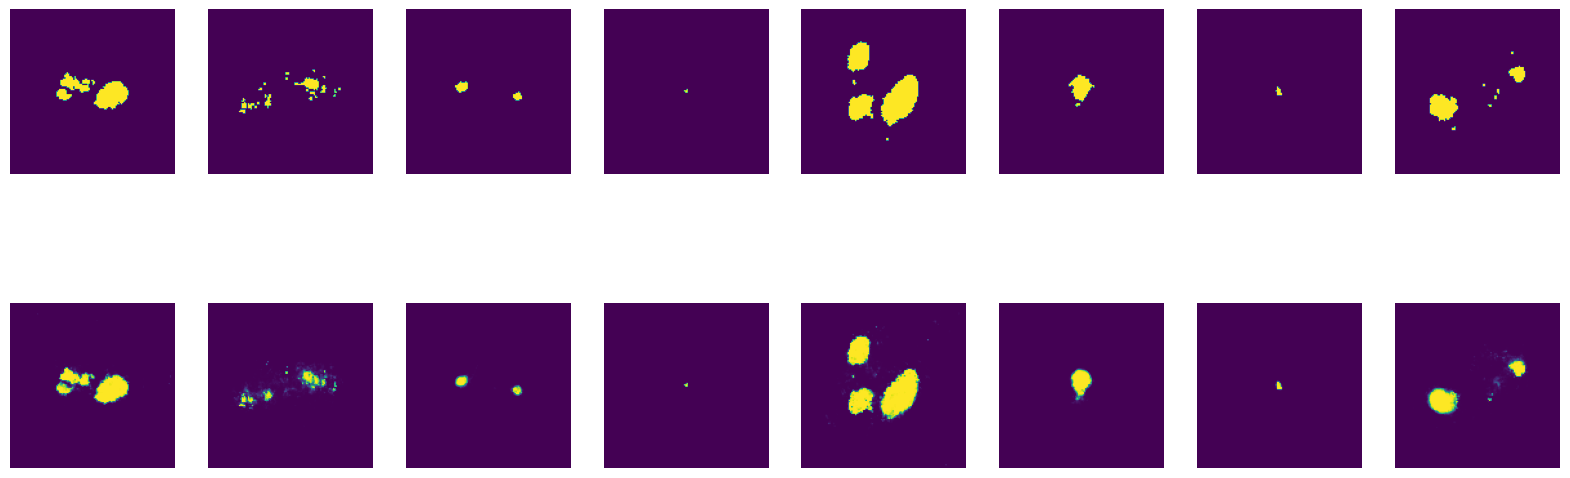

In [ ]:
fig, axs = plt.subplots(2, 8)
fig.set_figwidth(20)  # Sets overall figure width to 10 inches
fig.set_figheight(7)

axs[0, 0].imshow(images[0])


axs[1, 0].imshow(torch.sigmoid(y_hat_[0].cpu().reshape(128,128)))


axs[0, 1].imshow(images[1])

axs[1, 1].imshow(torch.sigmoid(y_hat_[1].cpu().reshape(128,128)))

axs[0, 2].imshow(images[2])

axs[1, 2].imshow(torch.sigmoid(y_hat_[2].cpu().reshape(128,128)))

axs[0, 3].imshow(images[3])

axs[1, 3].imshow(torch.sigmoid(y_hat_[3].cpu().reshape(128,128)))

axs[0, 4].imshow(images[4])

axs[1, 4].imshow(torch.sigmoid(y_hat_[4].cpu().reshape(128,128)))

axs[0, 5].imshow(images[5])

axs[1, 5].imshow(torch.sigmoid(y_hat_[5].cpu().reshape(128,128)))

axs[0, 6].imshow(images[6])

axs[1, 6].imshow(torch.sigmoid(y_hat_[6].cpu().reshape(128,128)))

axs[0, 7].imshow(images[7])

axs[1, 7].imshow(torch.sigmoid(y_hat_[7].cpu().reshape(128,128)))


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.axis('off')

In [ ]:
#@title get latent
from __future__ import print_function, division

import numpy as np
import pandas as pd
import sys
import os
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from  matplotlib import cm
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data
import torchvision

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn import metrics

from astropy.stats import circcorrcoef
from astropy import units as u

import src.models as models


def load_images(path):
    if path.endswith('mrc') or path.endswith('mrcs'):
        with open(path, 'rb') as f:
            content = f.read()
        images,_,_ = mrc.parse(content)
    elif path.endswith('npy'):
        images = np.load(path)
    return images




def get_latent(x, y, encoder_model, t_inf, r_inf, device):
    """
    Arguments
        x: base coordinates of the pixels, not rotated or translated
        y: input
        encoder_model: the encoder model
        t_inf: translation inference which can be 'unimodal' or 'attention'
        r_inf: rotation inference which can be 'unimodal' or 'attention' or 'attention+offsets'
        device: int
    Return
        z_content: rotation-translation-invariant representations
        theta_mu: predicted rotation for the object
        dx: prdicted translation for the object
    """
    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)
    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        with torch.no_grad():
            y = y.view(b, -1)
            z_mu,z_logstd = encoder_model(y)
            z_std = torch.exp(z_logstd)
            z_dim = z_mu.size(1)

            # z[0] is the rotation
            theta_mu = z_mu[:,0].unsqueeze(1)

            dx_mu = z_mu[:,1:3]
            dx = dx_mu

            z_content = torch.cat((z_mu[:,3:], z_std[:,3:]), dim=1)


    elif t_inf == 'attention' and r_inf == 'unimodal':
        with torch.no_grad():
            attn, sampled_attn, theta_vals, z_vals = encoder_model(y, device)

            #getting most probable t
            val, ind1 = attn.view(attn.shape[0], -1).max(1)
            ind0 = torch.arange(ind1.shape[0])

            z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
            theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

            z_dim = z_vals.size(1) // 2
            z_mu = z_vals[:,:z_dim, ]
            z_logstd = z_vals[:, z_dim:, ]
            z_std = torch.exp(z_logstd)

            # selecting z_values from the most probable t
            z_mu = z_mu[ind0, :, ind1]
            z_std = z_std[ind0, :, ind1]
            z_content = torch.cat((z_mu, z_std), dim=1)

            attn_softmax = F.softmax(attn.view(b, -1), dim=1).unsqueeze(2)

            attn_dim = attn.shape[3]
            if  attn_dim % 2:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
            else:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
            x_0,x_1 = np.meshgrid(x_grid, y_grid)
            x_coord_translate = np.stack([x_0.ravel(), x_1.ravel()], 1)
            x_coord_translate = torch.from_numpy(x_coord_translate).float().to(device)
            x_coord_translate = x_coord_translate.expand(b, x_coord_translate.size(0), x_coord_translate.size(1))
            x_coord_translate = x_coord_translate.transpose(1, 2)
            dx = torch.bmm(x_coord_translate, attn_softmax).squeeze(2)

            # selecting theta_means from the most probable t
            theta_mu = theta_vals[ind0, 0:1, ind1]


    else:
        with torch.no_grad():
            attn, _, _, _, _, theta_vals, z_vals = encoder_model(y, device)

            #getting most probable t_r
            val, ind1 = attn.view(attn.shape[0], -1).max(1)
            ind0 = torch.arange(ind1.shape[0])

            z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
            theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


            z_dim = z_vals.size(1) // 2
            z_mu = z_vals[:,:z_dim, ]
            z_logstd = z_vals[:, z_dim:, ]
            z_std = torch.exp(z_logstd)

            # selecting z_values from the most probable t_r
            z_mu = z_mu[ind0, :, ind1]
            z_std = z_std[ind0, :, ind1]
            z_content = torch.cat((z_mu, z_std), dim=1)

            attn_softmax = F.softmax(attn.view(b, -1), dim=1).view(attn.shape).sum(1).view(b, -1).unsqueeze(2)

            attn_dim = attn.shape[3]
            if  attn_dim % 2:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
            else:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
            x_0,x_1 = np.meshgrid(x_grid, y_grid)
            x_coord_translate = np.stack([x_0.ravel(), x_1.ravel()], 1)
            x_coord_translate = torch.from_numpy(x_coord_translate).to(device)
            x_coord_translate = x_coord_translate.expand(b, x_coord_translate.size(0), x_coord_translate.size(1))
            x_coord_translate = x_coord_translate.transpose(1, 2)
            dx = torch.bmm(x_coord_translate.type(torch.float), attn_softmax).squeeze(2)

            # selecting theta_means from the most probable t_r
            theta_mu = theta_vals[ind0, 0:1, ind1]


    return z_content, theta_mu, dx






def measure_correlations(path_to_transformations, r_pred, t_pred):
    """
    Arguments
        path_to_transformation: path to the transformations file
        r_pred:predicted rotation angles
        t_pred: predicted translation values
    Return
        r_corr: circular rotatation correlation
        t_corr: Pearson correaltion coefficient for translations over x and y
    """
    test_transforms = np.load(path_to_transformations)
    rot_val = test_transforms[:, 0].reshape(test_transforms.shape[0], 1)
    t_val = test_transforms[:, 1:].reshape(test_transforms.shape[0], 2)

    r_corr = circcorrcoef(rot_val, r_pred.numpy())
    x_corr = np.corrcoef(t_val[:,0], t_pred.numpy()[:,0])[0][1]
    y_corr = np.corrcoef(t_val[:,1], t_pred.numpy()[:,1])[0][1]
    t_corr = [x_corr, y_corr]

    return r_corr, t_corr



In [ ]:
z_values = torch.empty(len(images), 2*z_dim)
tr_pred = torch.empty(len(images), 2)
rot_pred = torch.empty(len(images), 1)

for i in range(0,len(images), 20):
    y = images3[i:i+20]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder_model, t_inf, r_inf, device)

    z_values[i:i+20] = a.cpu()
    rot_pred[i:i+20] = b.cpu()
    tr_pred[i:i+20]  = c.cpu()

In [ ]:
import random
train_resize_rotated = []
angles = []
for i in range(20):
  #angle = random.uniform(0, 180)
  angle = 90
  angles.append(angle)
  img = Image.fromarray(np.asarray(mnist_train[i]))
  new_img = img.rotate(angle, fillcolor = 'black')
  train_resize_rotated.append(np.asarray(new_img))
train_resize_rotated = np.asarray(train_resize_rotated)

In [ ]:
np.arange(3)

array([0, 1, 2])

In [ ]:
import random
train_resize_rotated = []
angles = []
for i in range(20):
  #angle = random.uniform(0, 180)
  angle = 45*i
  angles.append(angle)
  img = Image.fromarray(np.asarray(mnist_train[24]))
  new_img = img.rotate(angle, fillcolor = 'black')
  train_resize_rotated.append(np.asarray(new_img))
train_resize_rotated = np.asarray(train_resize_rotated)

In [ ]:
rot_pred*180/np.pi

In [ ]:
images = torch.from_numpy(train_resize_rotated)
images1 = images.view(-1, in_channels, image_dim, image_dim)
images2 = images1.to(device)
images3 = torch.utils.data.TensorDataset(images2)

images_iterator = torch.utils.data.DataLoader(images3, batch_size=20, shuffle = False)
_, _, _, y_hat_  = y_hat_eval_model_zero(images_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf,
                                                              device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)

21


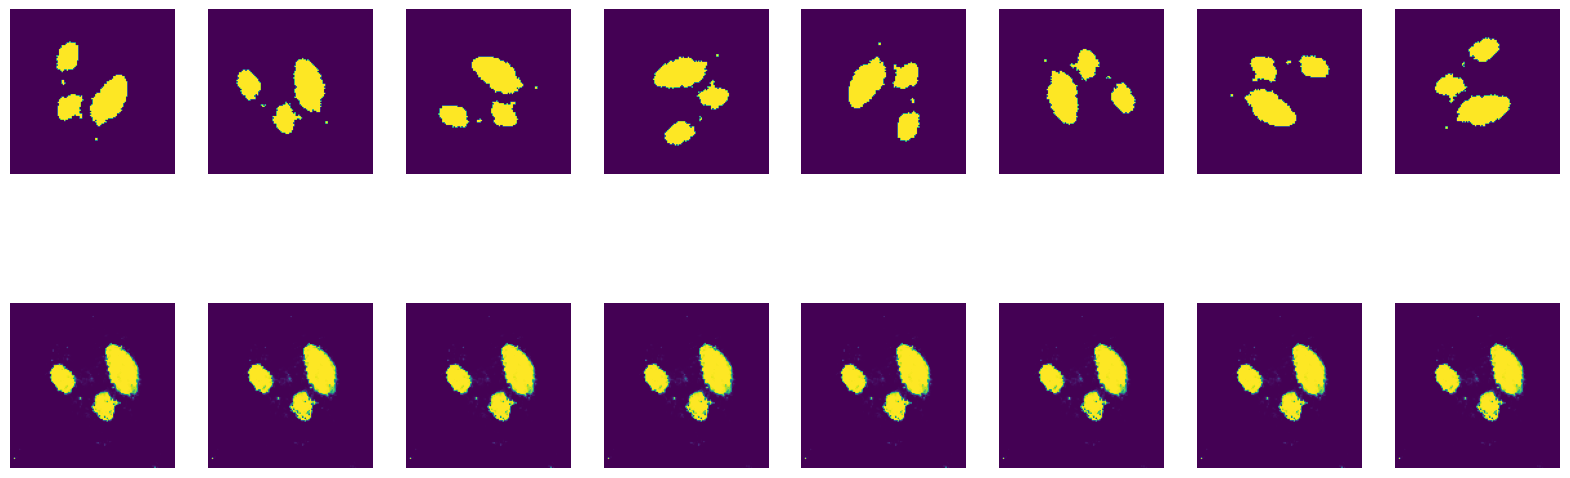

In [ ]:
fig, axs = plt.subplots(2, 8)
fig.set_figwidth(20)  # Sets overall figure width to 10 inches
fig.set_figheight(7)

axs[0, 0].imshow(images[0])


axs[1, 0].imshow(torch.sigmoid(y_hat_[0].cpu().reshape(128,128)))


axs[0, 1].imshow(images[1])

axs[1, 1].imshow(torch.sigmoid(y_hat_[1].cpu().reshape(128,128)))

axs[0, 2].imshow(images[2])

axs[1, 2].imshow(torch.sigmoid(y_hat_[2].cpu().reshape(128,128)))

axs[0, 3].imshow(images[3])

axs[1, 3].imshow(torch.sigmoid(y_hat_[3].cpu().reshape(128,128)))

axs[0, 4].imshow(images[4])

axs[1, 4].imshow(torch.sigmoid(y_hat_[4].cpu().reshape(128,128)))

axs[0, 5].imshow(images[5])

axs[1, 5].imshow(torch.sigmoid(y_hat_[5].cpu().reshape(128,128)))

axs[0, 6].imshow(images[6])

axs[1, 6].imshow(torch.sigmoid(y_hat_[6].cpu().reshape(128,128)))

axs[0, 7].imshow(images[7])

axs[1, 7].imshow(torch.sigmoid(y_hat_[7].cpu().reshape(128,128)))


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.axis('off')

In [ ]:
len(images3)

10

In [ ]:
z_values = torch.empty(len(train_resize_rotated), 2*z_dim)
tr_pred = torch.empty(len(train_resize_rotated), 2)
rot_pred = torch.empty(len(train_resize_rotated), 1)

for i in range(0,len(train_resize_rotated), 20):
    y = images3[i:i+20]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder_model, t_inf, r_inf, device)

    z_values[i:i+20] = a.cpu()
    rot_pred[i:i+20] = b.cpu()
    tr_pred[i:i+20]  = c.cpu()

In [ ]:
z_values.shape

torch.Size([20, 64])

In [ ]:
print(z_values)

tensor([[-1.5859e+00,  7.0684e-01,  9.5386e-02,  ...,  1.7986e-04,
          1.8311e-04,  6.8496e-05],
        [-1.5658e+00,  7.4868e-01,  1.9037e-02,  ...,  2.5261e-04,
          2.5230e-04,  1.0043e-04],
        [-1.5860e+00,  7.0689e-01,  9.5269e-02,  ...,  1.7983e-04,
          1.8308e-04,  6.8490e-05],
        ...,
        [-1.5658e+00,  7.4868e-01,  1.9037e-02,  ...,  2.5261e-04,
          2.5230e-04,  1.0043e-04],
        [-1.5860e+00,  7.0689e-01,  9.5269e-02,  ...,  1.7983e-04,
          1.8308e-04,  6.8490e-05],
        [-1.5390e+00,  7.4061e-01,  2.2815e-02,  ...,  2.3931e-04,
          2.3983e-04,  9.5124e-05]])


In [ ]:
pd.DataFrame(data=z_values[]

SyntaxError: incomplete input (<ipython-input-73-64651963dc6d>, line 1)

In [ ]:
_, _, _, y_hat  = y_hat_eval_model_zero(images_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf,
                                                              device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)

torch.Size([20, 32])
21


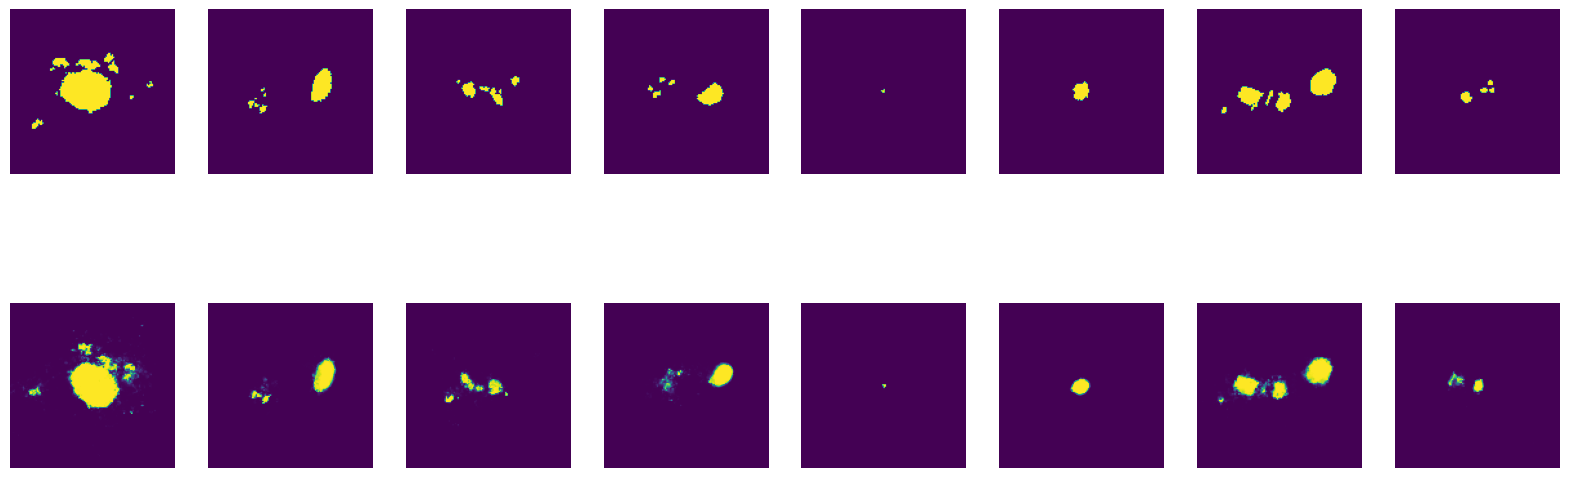

In [ ]:
fig, axs = plt.subplots(2, 8)
fig.set_figwidth(20)  # Sets overall figure width to 10 inches
fig.set_figheight(7)

axs[0, 0].imshow(images[0])


axs[1, 0].imshow(torch.sigmoid(y_hat[0].cpu().reshape(128,128)))


axs[0, 1].imshow(images[1])

axs[1, 1].imshow(torch.sigmoid(y_hat[1].cpu().reshape(128,128)))

axs[0, 2].imshow(images[2])

axs[1, 2].imshow(torch.sigmoid(y_hat[2].cpu().reshape(128,128)))

axs[0, 3].imshow(images[3])

axs[1, 3].imshow(torch.sigmoid(y_hat[3].cpu().reshape(128,128)))

axs[0, 4].imshow(images[4])

axs[1, 4].imshow(torch.sigmoid(y_hat[4].cpu().reshape(128,128)))

axs[0, 5].imshow(images[5])

axs[1, 5].imshow(torch.sigmoid(y_hat[5].cpu().reshape(128,128)))

axs[0, 6].imshow(images[6])

axs[1, 6].imshow(torch.sigmoid(y_hat[6].cpu().reshape(128,128)))

axs[0, 7].imshow(images[7])

axs[1, 7].imshow(torch.sigmoid(y_hat[7].cpu().reshape(128,128)))


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.axis('off')

In [ ]:
b = 20
rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
z_mu = z_values[:,:z_dim]
z_std = z_values[:, z_dim:]
r_z = rand_dist.sample((len(z_values), z_dim)).squeeze(2).to(device)
z = (z_std.to(device)*r_z + z_mu.to(device))

In [ ]:
generator_model.eval()
encoder_model.eval()
with torch.no_grad():
    for y, in images_iterator:
        b = y.size(0)
        x = Variable(x_coord)
        y_hat = reconstruct_no_rot_no_tr_z(x_coord,y,z, generator_model, device)

In [ ]:
z_values = torch.empty(len(train_resize_rotated), 2*z_dim)
tr_pred = torch.empty(len(train_resize_rotated), 2)
rot_pred = torch.empty(len(train_resize_rotated), 1)

for i in range(0,len(train_resize_rotated), 20):
    y = images3[i:i+20]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder_model, t_inf, r_inf, device)

    z_values[i:i+20] = a.cpu()
    rot_pred[i:i+20] = b.cpu()
    tr_pred[i:i+20]  = c.cpu()

In [ ]:
rot_pred*180/np.pi

tensor([[ -90.8315],
        [-111.4323],
        [ -77.6917],
        [ 100.0455],
        [ -40.7551],
        [  96.0236],
        [ -47.6298],
        [ 128.5674],
        [ -99.0463],
        [ -85.5058],
        [  95.2390],
        [  -0.8881],
        [ -70.9435],
        [  91.6867],
        [  -0.4653],
        [  91.4516],
        [ -75.4409],
        [ 186.8108],
        [ -61.7434],
        [ 179.5429]])

In [ ]:
z_values

tensor([[-1.9689e-01,  4.6203e-01,  2.2527e+00,  ...,  9.6119e-05,
          1.1839e-04,  9.0971e-05],
        [ 5.0770e-01, -1.2613e-01,  2.6223e+00,  ...,  1.6430e-04,
          2.9203e-04,  1.1741e-04],
        [-3.2344e+00,  6.8715e-01,  1.8045e+00,  ...,  6.8992e-05,
          8.8524e-05,  7.1405e-05],
        ...,
        [ 1.0019e+00,  2.3703e-01,  1.1243e+00,  ...,  1.3673e-04,
          1.2950e-04,  1.4377e-04],
        [ 7.2994e-01,  1.1637e+00,  1.6039e+00,  ...,  3.4464e-04,
          5.5566e-04,  4.7474e-04],
        [ 1.7268e+00,  5.5904e-01,  4.7671e-01,  ...,  4.6328e-03,
          4.0708e-03,  3.7811e-03]])

In [ ]:
len(data_train)

7223

In [ ]:
#@title z_values
z_values = torch.empty(len(data_train), 2*z_dim)
tr_pred = torch.empty(len(data_train), 2)
rot_pred = torch.empty(len(data_train), 1)

for i in range(0,len(data_train), minibatch_size):
    y = data_train[i:i+minibatch_size]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder_model, t_inf, r_inf, device)

    z_values[i:i+minibatch_size] = a.cpu()
    rot_pred[i:i+minibatch_size] = b.cpu()
    tr_pred[i:i+minibatch_size]  = c.cpu()

In [ ]:
z_values.shape

torch.Size([7223, 64])

In [ ]:
z_mu = z_values[:,:32]

In [ ]:
z_std = z_values[:,32:]

In [ ]:
z_values.shape

torch.Size([7223, 64])

In [ ]:
z_std

tensor([[1.9536e-03, 3.0010e-03, 1.9297e-03,  ..., 1.2966e-03, 2.3750e-03,
         1.7185e-03],
        [2.2591e-04, 2.9055e-04, 2.6349e-04,  ..., 2.6079e-04, 2.8248e-04,
         1.9665e-04],
        [1.8256e-03, 1.9722e-03, 9.4132e-04,  ..., 1.8576e-03, 1.6229e-03,
         1.1989e-03],
        ...,
        [1.0683e-04, 1.0001e-04, 6.6529e-05,  ..., 1.0125e-04, 1.1733e-04,
         8.6888e-05],
        [2.3795e-03, 1.9916e-03, 1.4390e-03,  ..., 2.3594e-03, 2.1466e-03,
         1.8387e-03],
        [2.4364e-03, 3.2941e-03, 2.5316e-03,  ..., 2.9799e-03, 3.3549e-03,
         3.2644e-03]])

In [ ]:
z_z = z_values.reshape((7223*2,32))

In [ ]:
z_z

tensor([[ 1.2832e-01, -2.2418e+00,  3.6178e-01,  ...,  8.0424e-01,
         -8.3671e-01,  5.4838e-01],
        [ 1.9536e-03,  3.0010e-03,  1.9297e-03,  ...,  1.2966e-03,
          2.3750e-03,  1.7185e-03],
        [-2.1392e+00, -7.6478e-02,  6.8729e-01,  ...,  1.6244e+00,
          1.1180e+00, -1.8815e+00],
        ...,
        [ 2.3795e-03,  1.9916e-03,  1.4390e-03,  ...,  2.3594e-03,
          2.1466e-03,  1.8387e-03],
        [-2.8666e-02,  3.0704e-01, -2.1461e-01,  ..., -7.8381e-02,
          4.2122e-01, -8.5625e-02],
        [ 2.4364e-03,  3.2941e-03,  2.5316e-03,  ...,  2.9799e-03,
          3.3549e-03,  3.2644e-03]])

In [ ]:
batch_size=20
images_iterator = torch.utils.data.DataLoader(data_train, batch_size=20, shuffle = False)
y_reconstruct_no_rot = torch.empty((len(data_train),128*128))
generator_model.eval()
encoder_model.eval()
i=0
with torch.no_grad():
    for y, in images_iterator:
        #b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)
        y_reconstruct_no_rot[i:i+batch_size] = reconstruct_no_rot_no_tr(x_coord,y,z_values[i:i+batch_size], generator_model, device)
        i = i+batch_size

In [ ]:
y_reconstruct_no_rot.shape

torch.Size([7223, 16384])

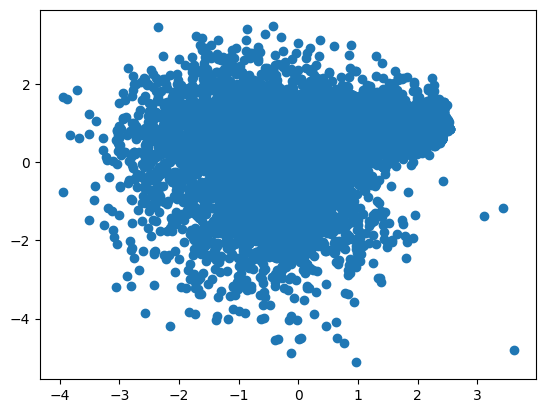

In [ ]:
plt.scatter(z_values[:,0],z_values[:,30])

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
c.shape

clustering sunspots

# using CUDA device: 0
# clustering with z-dim: 32
# translation inference is attention
# rotation inference is attention+offsets
# saving tsne figure ... 
<ipython-input-32-cb1850e47ef3>:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(tsne[:, 0], tsne[:, 1], cmap=cmap, norm=norm, s=2)


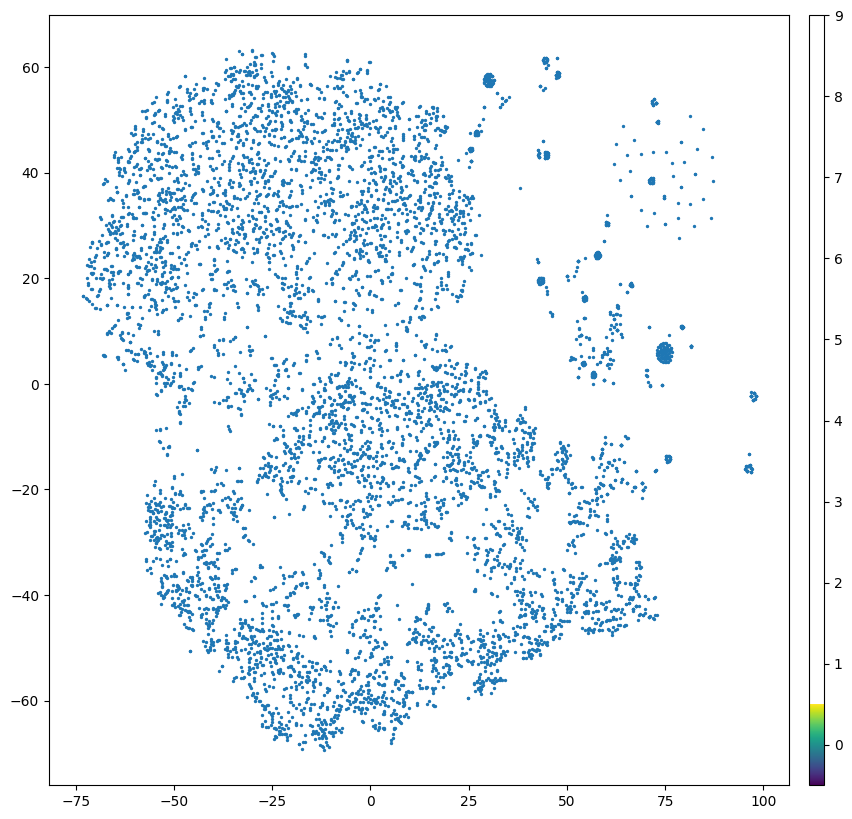

In [ ]:
#@title clustering
import argparse



parser = argparse.ArgumentParser('Clustering galaxy')

parser.add_argument('--train-path', default='data/galaxy_zoo/galaxy_zoo_train.npy', help='path to training data (default:data/galaxy_zoo/galaxy_zoo_train.npy)')
parser.add_argument('--test-path', default='data/galaxy_zoo/galaxy_zoo_test.npy', help='path to testing data (default:data/galaxy_zoo/galaxy_zoo_test.npy)')
parser.add_argument('-z', '--z-dim', type=int, default=32, help='latent variable dimension (default:2)')

#parser.add_argument('--path-to-encoder', default = '/content/inference_epoch080.sav', help='path to the saved encoder model')

parser.add_argument('--t-inf', default='attention', choices=['unimodal', 'attention'], help='unimodal | attention')
parser.add_argument('--r-inf', default='attention+offsets', choices=['unimodal', 'attention', 'attention+offsets'], help='unimodal | attention | attention+offsets')

parser.add_argument('--clustering', default='k-means', choices=['agglomerative', 'k-means'], help='agglomerative | k-means (default:agglomerative)')
parser.add_argument('--n-clusters', default=10, type=int, help='Number of clusters (default:10)')

parser.add_argument('--in-channels', type=int, default=1, help='number of channels in the images (default:3)')
parser.add_argument('--activation', choices=['tanh', 'leakyrelu'], default='leakyrelu', help='activation function (default: leakyrelu)')

parser.add_argument('--minibatch-size', type=int, default=64, help='minibatch size (default: 100)')
parser.add_argument('-d', '--device', type=int, default=0, help='compute device to use (default:0)')
parser.add_argument('-f')

args = parser.parse_args()

## load the images
images= mnist_train
#images = torch.from_numpy(images).float()


n,m = images.shape[1:]

# x coordinate array
xgrid = np.linspace(-1, 1, m)
ygrid = np.linspace(1, -1, n)
x0,x1 = np.meshgrid(xgrid, ygrid)
x_coord = np.stack([x0.ravel(), x1.ravel()], 1)
x_coord = torch.from_numpy(x_coord).float()

in_channels = 1
y_test = images.view(-1, in_channels, n, m)

## set the device
d = args.device
use_cuda = (d != -1) and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(d)
    print('# using CUDA device:', d, file=sys.stderr)
    device = torch.device("cuda:" + str(d) if use_cuda else "cpu")
else:
    device = torch.device("cpu")

y_test = y_test.to(device)
x_coord = x_coord.to(device)

data_test = torch.utils.data.TensorDataset(y_test)

z_dim = args.z_dim
print('# clustering with z-dim:', z_dim, file=sys.stderr)

# defining encoder model
t_inf = args.t_inf
r_inf = args.r_inf

print('# translation inference is {}'.format(t_inf), file=sys.stderr)
print('# rotation inference is {}'.format(r_inf), file=sys.stderr)

#path_to_encoder = args.path_to_encoder
#encoder = torch.load(path_to_encoder)
encoder = encoder_model.to(device)

minibatch_size = args.minibatch_size

#folder for writing log files
#path_prefix = '/'.join(path_to_encoder.split('/')[:-1])

z_values = torch.empty(len(data_test), 2*z_dim)
tr_pred = torch.empty(len(data_test), 2)
rot_pred = torch.empty(len(data_test), 1)

# getting predicted z, rotation, and translation for the data
for i in range(0,len(data_test), minibatch_size):
    y = data_test[i:i+minibatch_size]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder, t_inf, r_inf, device)

    z_values[i:i+minibatch_size] = a.cpu()
    rot_pred[i:i+minibatch_size] = b.cpu()
    tr_pred[i:i+minibatch_size]  = c.cpu()

n_clusters = args.n_clusters
if args.clustering == 'agglomerative':
    # AgglomerativeClustering
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_full_tree=True)
    cluster = ac.fit_predict(z_values.detach().cpu())
elif args.clustering == 'k-means':
    # k-means clustering
    km = KMeans(n_clusters, n_init=100).fit(z_values.detach().cpu())
    cluster = km.predict(z_values.detach().cpu())

#if args.path_to_transformations:
#    rot_corr, tr_corr = measure_correlations(args.path_to_transformations, rot_pred, tr_pred)



# saving tsne figure
print('# saving tsne figure ... ', file=sys.stderr)
tsne = TSNE(2, learning_rate=200.0, init='random').fit_transform(z_values.detach())
plt.figure(figsize=(10, 10))

cmap = plt.cm.rainbow
norm = colors.BoundaryNorm(np.arange(0, 11, 1), cmap.N)

plt.scatter(tsne[:, 0], tsne[:, 1], cmap=cmap, norm=norm, s=2)

# to modify size of the colorbar
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

# to make the number on the colorbar centered
cb = plt.colorbar(cax=cax)
labels = np.arange(0, n_clusters, 1)
loc = labels + .5
cb.set_ticks(loc)
cb.set_ticklabels(labels)

#plt.savefig(path_prefix + "/tsne.jpg")





In [ ]:
# save the figure of z latent variable if z_dim=2
if z_dim == 12:
    plt.figure(figsize=(10, 10))
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(0, n_clusters+1, 1), cmap.N)
    plt.scatter(z_values[:, 0].detach().cpu().numpy(), z_values[:, 9].detach().cpu().numpy(), c=cluster,
        cmap=cmap, norm=norm, s=0.1)
    plt.savefig(path_prefix + 'z_vals.jpg')

PCA

In [ ]:
z_dim

32

In [ ]:
b = 20
rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
z_mu = z_values[:,:z_dim]
z_std = z_values[:, z_dim:]
r_z = rand_dist.sample((len(z_values), z_dim)).squeeze(2).to(device)
z = (z_std.to(device)*r_z + z_mu.to(device))

In [ ]:
z.shape

torch.Size([7223, 32])

In [ ]:
def reconstruct_no_rot_no_tr_z(x,y, z, generator_model, device
                  ):

        b = y.size(0)
        btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
        x = x.expand(b, x.size(0), x.size(1)).to(device)

        y = y.to(device)

        # draw samples from variational posterior to calculate

        theta = torch.zeros(b).to(device)#

        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        # reconstruct
        y_hat = generator_model(x.contiguous(), z)
        y_hat = y_hat.view(b, -1)

        return y_hat

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.95)
reduced = pca.fit_transform(z.cpu())

In [ ]:
print('Initial latent size (VAE):', z.shape)
print('Reduced latent size (VAE+PCA):', reduced.shape)

Initial latent size (VAE): torch.Size([7223, 32])
Reduced latent size (VAE+PCA): (7223, 15)


In [ ]:
with torch.no_grad():
    rmu = pca.transform(z.cpu())
    irmu = pca.inverse_transform(rmu).reshape(z.shape)

In [ ]:
z_values.shape

torch.Size([7223, 64])

In [ ]:
irmu.shape

(7223, 64)

In [ ]:
batch_size=20
images_iterator = torch.utils.data.DataLoader(data_train, batch_size=20, shuffle = False)
y_reconstruct_no_rot = torch.empty((len(data_train),128*128))
generator_model.eval()
encoder_model.eval()
i=0
with torch.no_grad():
    for y, in images_iterator:
        #b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)
        y_reconstruct_no_rot[i:i+batch_size] = reconstruct_no_rot_no_tr_z(x_coord,y,torch.tensor(z[i:i+batch_size]).float(), generator_model, device)
        i = i+batch_size

<ipython-input-90-4dfae3489896>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_reconstruct_no_rot[i:i+batch_size] = reconstruct_no_rot_no_tr_z(x_coord,y,torch.tensor(z[i:i+batch_size]).float(), generator_model, device)


In [ ]:
y_reconstruct_no_rot.shape

torch.Size([7223, 16384])

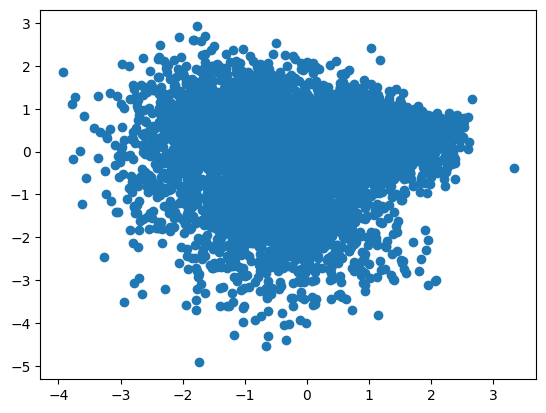

In [ ]:
plt.scatter(irmu[:,0],irmu[:,1])

In [ ]:
def make_samples(i, j, i_range, j_range, net, pca, iterator, x_coord):
    net.eval()
    y_reconstruct_no_rot_z = torch.empty((25,128*128))
    with torch.no_grad():
        z = np.zeros((len(i_range), len(j_range), pca.components_.shape[0]))
        z[:, :, [i-1, j-1]] = np.array(np.meshgrid(i_range, j_range)).T
        z = z.reshape(-1, z.shape[-1])
        t = pca.inverse_transform(z)
        inp = torch.tensor(t).to(device).float()
        for y, in iterator:
        #b = y.size(0)
              x = Variable(x_coord)
              y = Variable(y)
              y_reconstruct_no_rot_z = reconstruct_no_rot_no_tr_z(x_coord,y,inp, generator_model, device)

        return y_reconstruct_no_rot_z.cpu()

        #inp = inp.reshape(t.shape[0], 16, 16, 16)
        #y = net.decode(inp)
    #return y.detach().cpu().numpy()

In [ ]:
print(min(rmu[:,0]),max(rmu[:,0]))
print(min(rmu[:,1]),max(rmu[:,1]))

-4.888088666711205 12.834145218263652
-6.9409089193638875 8.549297052099423


In [ ]:
images_iterator = torch.utils.data.DataLoader(data_train[0:25], batch_size=25, shuffle = False)
#y = torch.empty((25,128*128))


rows = 5
cols = 5

i = 1
j = 2
i_range = np.linspace(-6, 10, rows)
j_range = np.linspace(-8, 8, cols)
samples = make_samples(i, j, i_range, j_range, generator_model, pca, images_iterator, x_coord)


In [ ]:
samples.shape

torch.Size([25, 16384])

In [ ]:
np.linspace(-20, 20, 5)

array([-20., -10.,   0.,  10.,  20.])

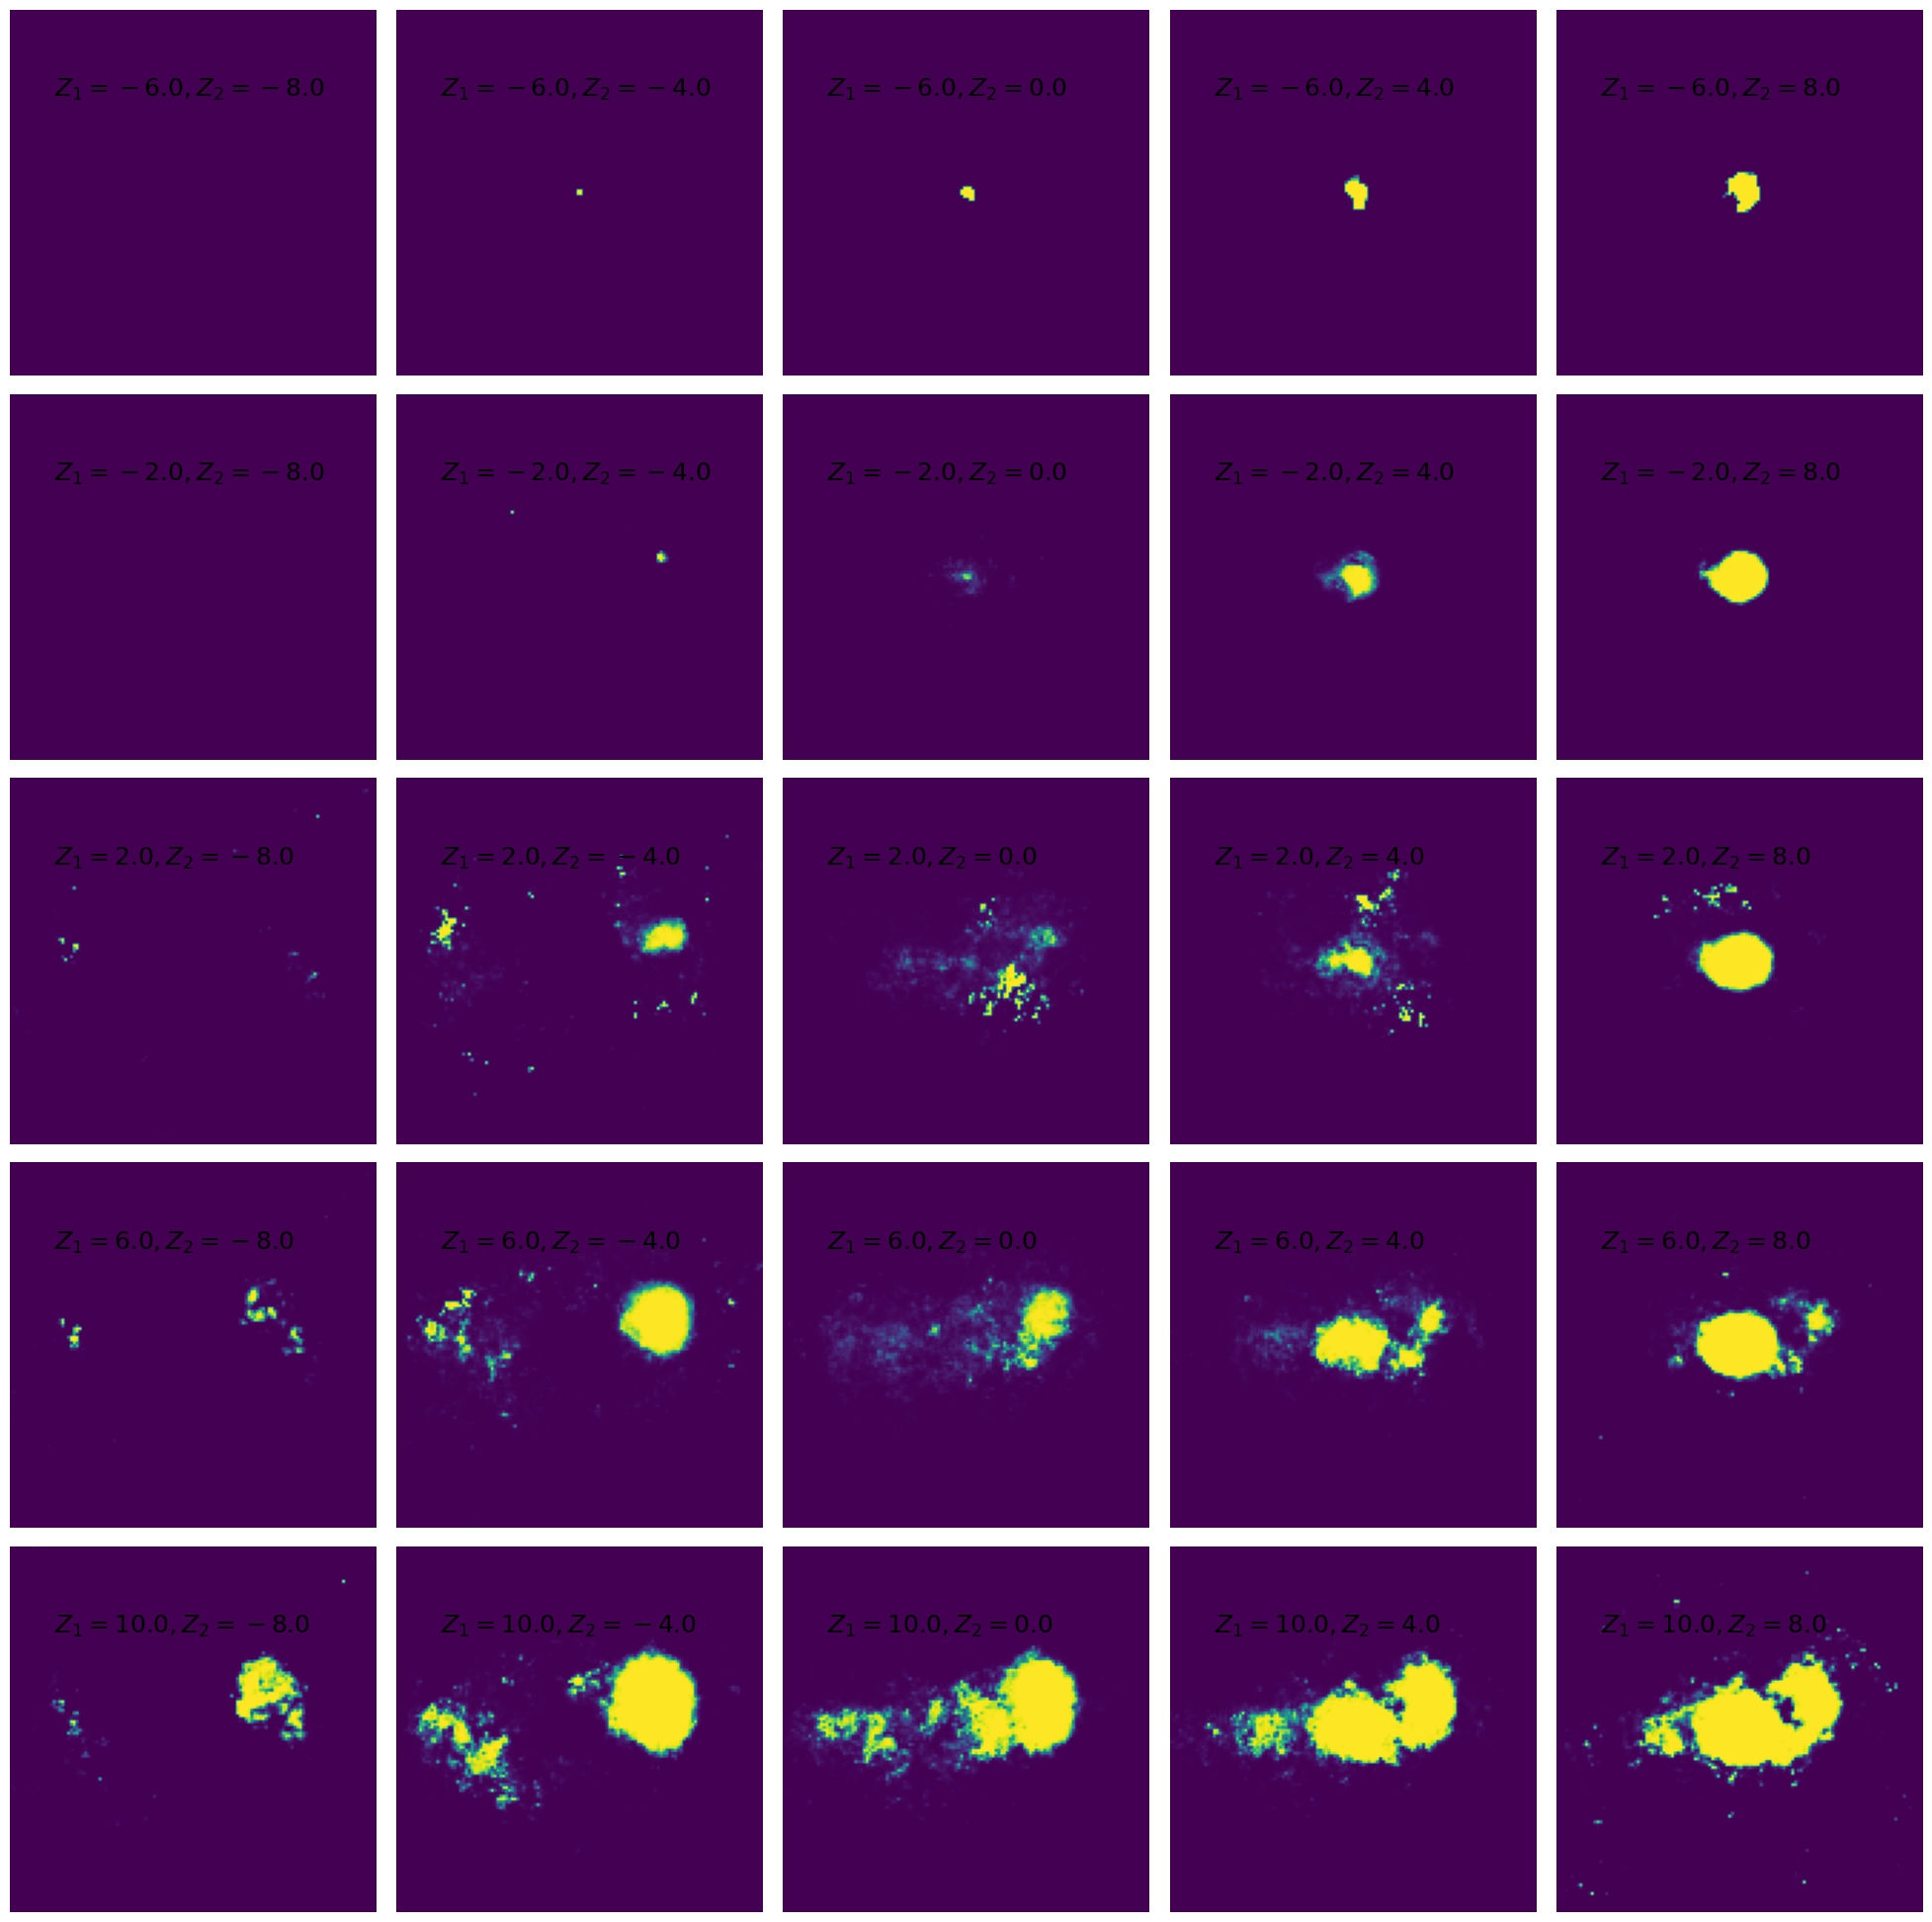

In [ ]:
fig, ax = plt.subplots(rows, cols, figsize=(5*rows, 5*cols))
fig.patch.set_facecolor('xkcd:white')
for r in range(rows):
    for c in range(cols):
        ax[r, c].imshow(torch.sigmoid(samples[r*cols+c]).reshape((128,128)), vmin=0, vmax=1)
        ax[r, c].axis(False)
        ax[r, c].text(15, 30,
                      r'$Z_{}={}, Z_{}={}$'.format(i, i_range[r], j, j_range[c]),
                      size=18)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
samples[1, 0]

tensor(-69.8715)

In [ ]:
print(min(reduced[:,1]),max(reduced[:,1]))
print(min(reduced[:,3]),max(reduced[:,3]))

-6.940908919363894 8.549297052099423
-4.441736584411663 5.618680683995075


In [ ]:
rows = 5
cols = 5

i = 1
j = 4
i_range = np.linspace(-8, 8, rows)
j_range = np.linspace(-5, 5, cols)
samples = make_samples(i, j, i_range, j_range, generator_model, pca, images_iterator, x_coord)

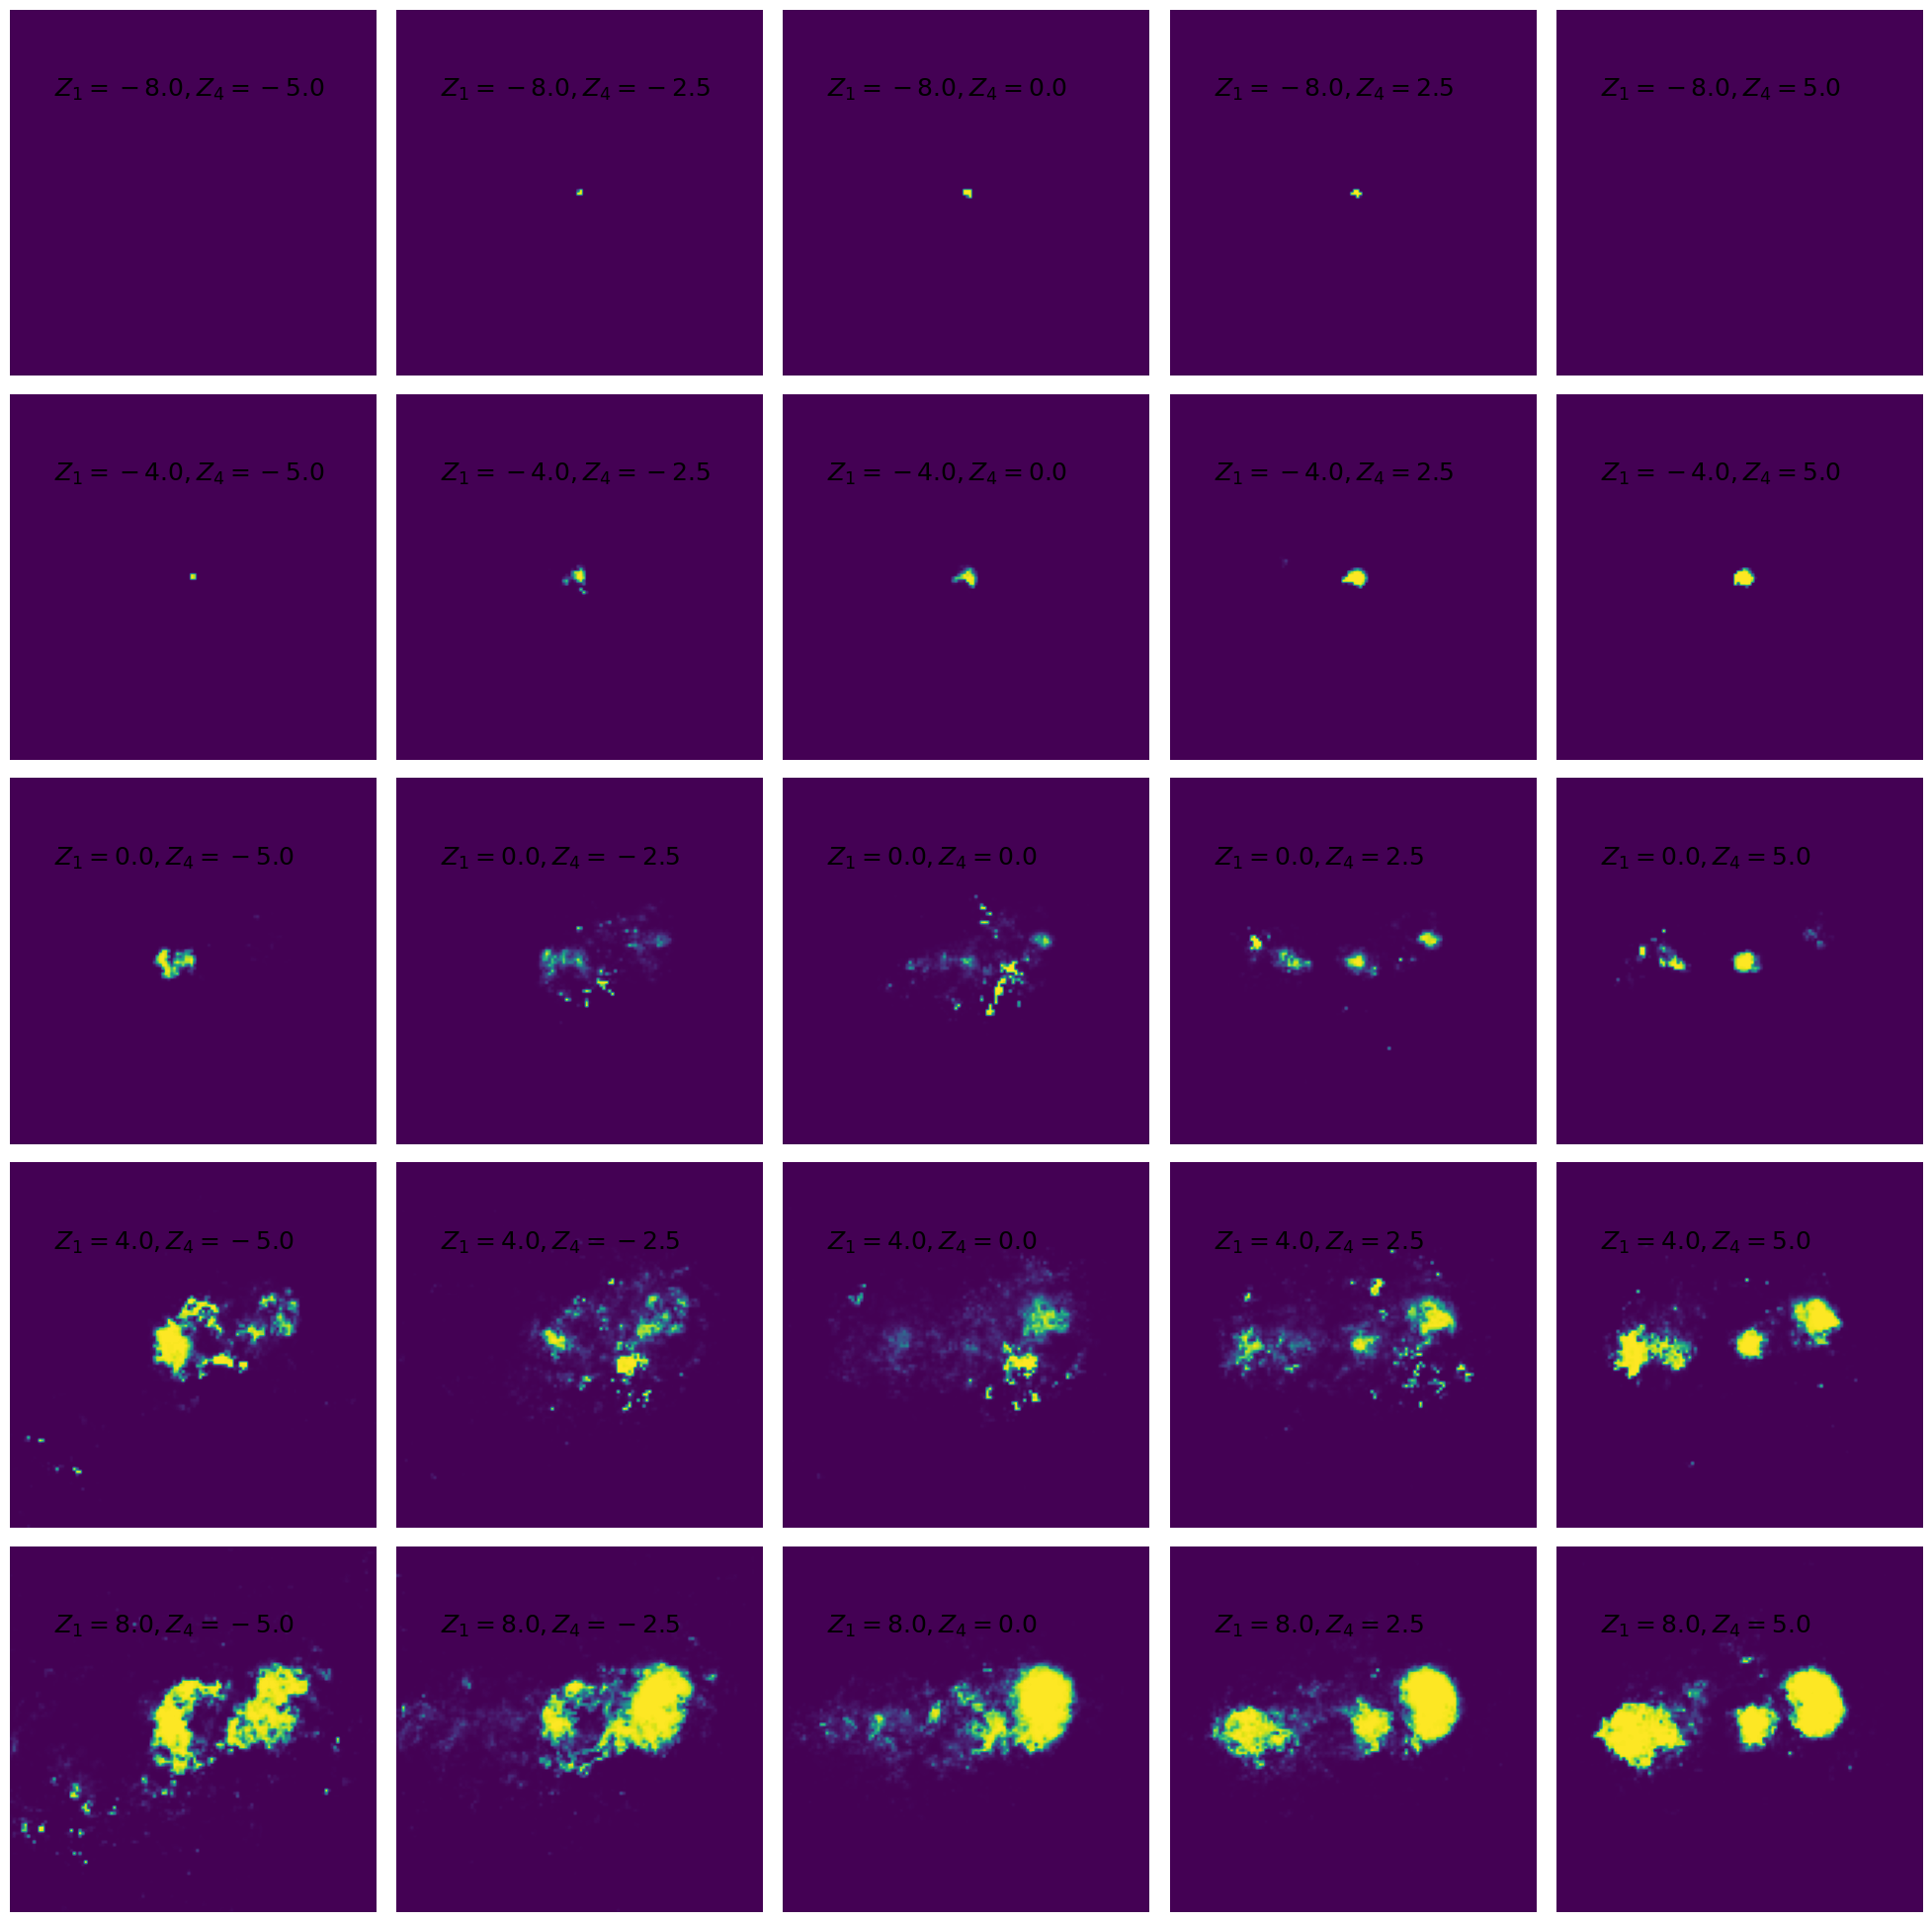

In [ ]:
fig, ax = plt.subplots(rows, cols, figsize=(5*rows, 5*cols))
fig.patch.set_facecolor('xkcd:white')
for r in range(rows):
    for c in range(cols):
        ax[r, c].imshow(torch.sigmoid(samples[r*cols+c]).reshape((128,128)), vmin=0, vmax=1)
        ax[r, c].axis(False)
        ax[r, c].text(15, 30,
                      r'$Z_{}={}, Z_{}={}$'.format(i, i_range[r], j, j_range[c]),
                      size=18)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
irmu.shape

(7223, 64)

In [ ]:

i_range_0 = np.linspace(min(irmu[:,0]),max(irmu[:,0]), 5)

In [ ]:
batch_size=5
images_iterator = torch.utils.data.DataLoader(data_train[0:5], batch_size=5, shuffle = False)
y_reconstruct_no_rot = torch.empty((len(data_train),128*128))
generator_model.eval()
encoder_model.eval()
i=0
with torch.no_grad():
    for y, in images_iterator:
        #b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)
        y_reconstruct_no_rot[i:i+batch_size] = reconstruct_no_rot_no_tr(x_coord,y,torch.tensor(i_range_0).float(), generator_model, device)
        i = i+batch_size

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
print(min(irmu[:,0]),max(irmu[:,0]))

-3.6845197249316515 4.870816128800766


In [ ]:
#z_values = torch.empty(len(data_train), 2*z_dim)
#tr_pred = torch.empty(len(data_train), 2)
#rot_pred = torch.empty(len(data_train), 1)


for i in range(0,len(data_train), minibatch_size):
    y = data_train[i:i+minibatch_size]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder_model, t_inf, r_inf, device)

    z_values[i:i+minibatch_size] = a.cpu()
    rot_pred[i:i+minibatch_size] = b.cpu()
    tr_pred[i:i+minibatch_size]  = c.cpu()

In [ ]:
z_values.shape

torch.Size([7223, 64])

АНАЛИЗ

In [ ]:
dfp = pd.read_csv('../content/sunspot_group_properties.csv').set_index('fname')
dfp.head()

,date,group_number,lat_max,lat_mean,lat_min,long_max,long_mean,long_min,area,nspots,ncores,nspots_with_cores,tilt,complexity,B0,L0
fname,,,,,,,,,,,,,,,,
201007230452_63,2010-07-23 04:52:00,63,-20.896839,-23.565131,-26.597699,204.043367,200.328655,194.646751,489.292797,17,16,6,-2.385188,210,5.0,230.3
201007240414_63,2010-07-24 04:14:00,63,-21.131845,-23.933526,-27.108871,204.704703,201.274268,194.511357,303.408179,9,4,3,-23.918642,241,5.1,217.4
201007250447_64,2010-07-25 04:47:00,64,23.580196,23.339903,23.101008,149.500812,149.048761,148.527835,16.553683,1,0,0,3.633730,78,5.2,203.9
201007250447_63,2010-07-25 04:47:00,63,-20.642013,-23.509269,-26.938974,204.949343,201.557542,195.071475,297.469260,12,7,3,-32.418379,232,5.2,203.9
201007260349_63,2010-07-26 03:49:00,63,-20.258757,-23.032369,-26.887540,205.544796,202.530956,198.138547,193.869511,9,3,2,-40.638848,255,5.0,191.2


In [ ]:
dfp = dfp.loc[fnames]

In [ ]:
rmu.shape

(7223, 15)

In [ ]:
df_values = pd.DataFrame(rmu).set_index([fnames])
df_values.index.name = 'fname'

In [ ]:
df_values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
fname,,,,,,,,,,,,,,,
201310250528_340,6.093472,3.791138,3.475977,-1.952029,0.702503,-0.360058,-0.221425,2.158993,-0.238047,-0.785500,-0.802133,1.847198,-0.800564,0.341865,0.485302
201104290402_66,3.707709,-2.255727,-1.364006,-0.060155,-2.693923,1.154132,0.440313,-1.762104,-0.776457,1.042086,1.797928,-0.387337,-1.410269,0.243402,-0.063229
201110280458_263,1.480552,2.953294,1.936419,0.953850,1.682310,1.325375,-0.414936,-0.183522,-1.371027,0.750634,0.166696,-1.361473,-0.793067,-1.043990,-0.823992
201404030658_111,2.677384,-2.416042,-1.964612,-0.518176,-2.094585,1.726315,-0.555310,-1.229268,-0.257125,0.402318,-0.460152,0.075303,0.344529,-0.837112,0.578577
201211140555_329,-3.008701,-2.670479,1.164029,-0.622057,-0.055366,-0.030323,-0.254873,-0.399015,0.202482,-0.247903,0.122094,-0.008351,0.230580,-0.027164,-0.088832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201409170342_304,-1.252774,-1.110106,2.680611,1.323503,-1.058253,-0.003496,-0.068574,-1.457881,-0.369197,-0.433621,0.260113,-0.371255,0.300257,-0.301569,-0.540479
201406030342_171,-3.630471,-1.949909,0.455593,-0.311867,0.449809,0.223541,-0.051116,0.272298,0.580957,0.254512,0.410403,-0.158221,0.374925,0.475648,0.237780
201407070348_223,-3.366316,1.542080,-0.213008,0.152158,1.794379,2.896947,-0.423578,1.828617,0.201894,1.019510,-1.212511,-1.343031,-0.419247,0.654504,0.014370


In [ ]:
df = dfp.join(df_values)
df.head()

,date,group_number,lat_max,lat_mean,lat_min,long_max,long_mean,long_min,area,nspots,...,5,6,7,8,9,10,11,12,13,14
fname,,,,,,,,,,,,,,,,,,,,,
201310250528_340,2013-10-25 05:28:00,340,-9.206801,-11.708021,-15.021721,13.514340,8.375183,4.295870,604.365637,9,...,-0.360058,-0.221425,2.158993,-0.238047,-0.785500,-0.802133,1.847198,-0.800564,0.341865,0.485302
201104290402_66,2011-04-29 04:02:00,66,-14.306327,-15.924862,-18.157682,196.772295,193.999049,186.608689,298.863562,6,...,1.154132,0.440313,-1.762104,-0.776457,1.042086,1.797928,-0.387337,-1.410269,0.243402,-0.063229
201110280458_263,2011-10-28 04:58:00,263,13.429909,12.440177,11.189003,305.125738,301.003834,297.760312,159.095210,6,...,1.325375,-0.414936,-0.183522,-1.371027,0.750634,0.166696,-1.361473,-0.793067,-1.043990,-0.823992
201404030658_111,2014-04-03 06:58:00,111,17.927525,16.407292,15.360370,32.088955,30.056272,25.554800,156.620128,5,...,1.726315,-0.555310,-1.229268,-0.257125,0.402318,-0.460152,0.075303,0.344529,-0.837112,0.578577
201211140555_329,2012-11-14 05:55:00,329,26.001358,25.855957,25.668047,254.393585,254.187825,254.028626,4.349033,1,...,-0.030323,-0.254873,-0.399015,0.202482,-0.247903,0.122094,-0.008351,0.230580,-0.027164,-0.088832


In [ ]:
tilt = np.asarray(df['tilt'])

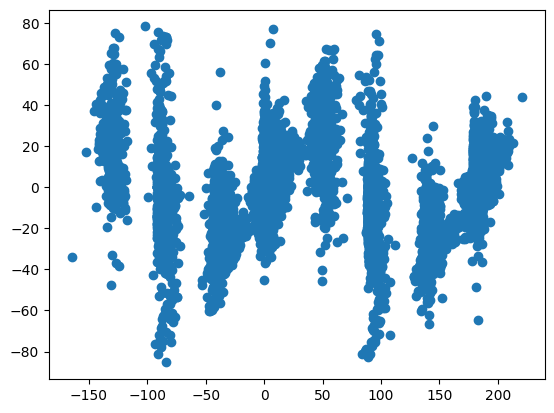

In [ ]:
plt.scatter(rot_pred.reshape(7223)*180/np.pi,tilt)

In [ ]:
from scipy.stats import pearsonr
pearsonr(rot_pred.reshape(7223)*180/np.pi,tilt)

PearsonRResult(statistic=-0.08062238843112525, pvalue=6.7931353129823545e-12)

In [ ]:
rot_pred.reshape(7223)

tensor([-0.4846,  0.0038,  3.1943,  ...,  0.1039, -0.1931,  0.8665])

In [ ]:
tilt.shape

(7223,)

In [ ]:
np.cov(rot_pred.reshape(7223)*180/np.pi,tilt)

array([[8678.38797642, -153.38921267],
       [-153.38921267,  417.09910199]])

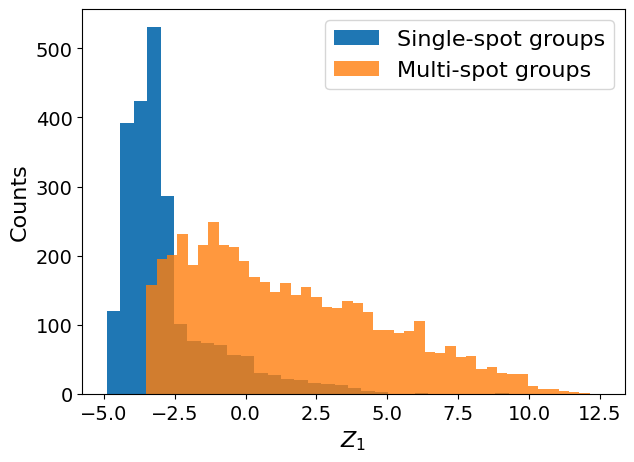

In [ ]:
fig, ax = plt.subplots(1, figsize=(7, 5))
fig.patch.set_facecolor('xkcd:white')

mask = (df.nspots == 1)
plt.hist(df.loc[mask,0], bins=30, color='tab:blue', label='Single-spot groups')

mask = (dfp.nspots >= 2)
plt.hist(df.loc[mask, 0], bins=np.linspace(-3.5, 12.5, 45),
         color='tab:orange', alpha=0.8, label='Multi-spot groups')

plt.ylabel('Counts', fontsize=16)
plt.xlabel(r'$Z_1$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

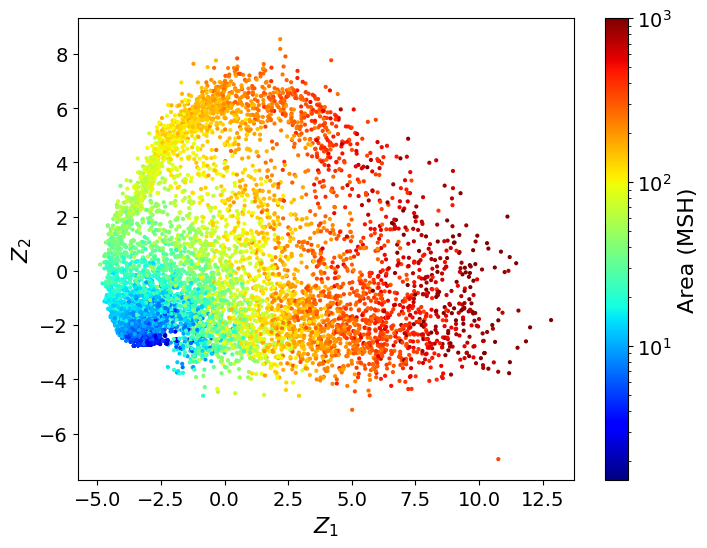

In [ ]:
import matplotlib
fig, ax = plt.subplots(1, figsize=(8, 6))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(*df[[0, 1]].values.T, s=4,
            cmap='jet',
            c=np.clip(df.area, 0, 1000),
            norm=matplotlib.colors.LogNorm())

plt.ylabel(r'$Z_2$', fontsize=16)
plt.xlabel(r'$Z_1$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Area (MSH)', rotation=90, fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.show()

In [ ]:
rot_pred.shape

torch.Size([7223, 1])

In [ ]:
max(rmu[:,1])

8.549297052099423

In [ ]:
df.loc[mask,0]

fname
201405010658_138   -2.787989
201310060849_314   -2.721489
201412140802_397    1.273667
201712240744_81    -3.885418
201108010624_160   -4.262445
                      ...   
201305090343_129    4.141266
201406270308_202   -3.103770
201509070423_227   -2.964181
201107280403_152   -4.402693
201406030342_171   -3.630528
Name: 0, Length: 1770, dtype: float64

In [ ]:
batch_size=20
images_iterator = torch.utils.data.DataLoader(data_train, batch_size=20, shuffle = False)
y_reconstruct_no_rot = torch.empty((len(data_train),128*128))
generator_model.eval()
encoder_model.eval()
i=0
with torch.no_grad():
    for y, in images_iterator:
        #b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)
        y_reconstruct_no_rot[i:i+batch_size] = reconstruct_no_rot_no_tr_z(x_coord,y,torch.tensor(irmu[i:i+batch_size]).float().to(device), generator_model, device)
        i = i+batch_size

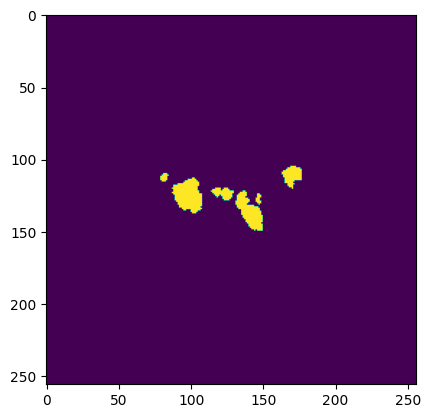

In [ ]:
f = sparse.load_npz(id_train[2][0]).toarray().reshape(256, 256, 3)
f = transform_channels(f)
plt.imshow(f.reshape(256,256))

In [ ]:
dfp.index

Index(['201007230452_63', '201007240414_63', '201007250447_64',
       '201007250447_63', '201007260349_63', '201007260349_64',
       '201007270248_63', '201007280344_63', '201007300650_65',
       '201007310225_65',
       ...
       '202008070320_31', '202008070320_32', '202008080349_31',
       '202008090356_31', '202008100346_31', '202008120532_31',
       '202008120532_33', '202008180351_34', '202008190344_35',
       '202008190344_34'],
      dtype='object', name='fname', length=8498)

In [ ]:
id = np.asarray(index)

In [ ]:
id_train, id_test = train_test_split(id,train_size=0.85, shuffle=True, random_state=42)

In [ ]:

from pathlib import Path
fnames = []
for i in range(len(id_train)):

  file_path = id_train[i][0]

  fnames.append(Path(file_path).stem)

# stem attribute extracts the file
# name
#print(Path(file_path).stem)

In [ ]:
fnames[0]

'201310250528_340'

In [ ]:
ind_list = fnames
dfp.iloc[fnames]

ValueError: invalid literal for int() with base 10: '201303300429_-2'

In [ ]:
fnames

In [ ]:
train_resize.shape

(8498, 128, 128)

In [ ]:
df = pd.DataFrame(data, index=data[:,0])

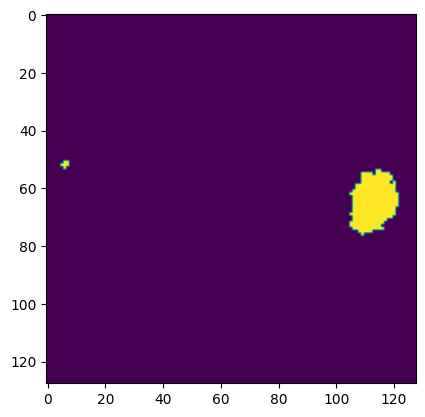

In [ ]:
plt.imshow(mnist_train[7000].cpu())

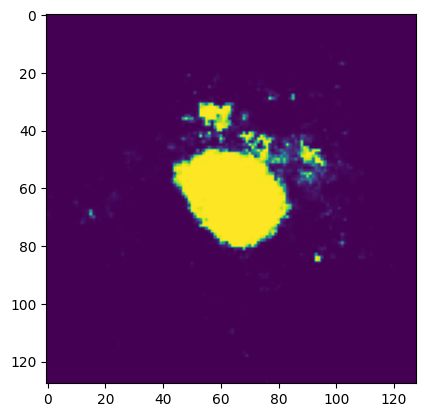

In [ ]:
plt.imshow(torch.sigmoid(y_reconstruct_no_rot[0]).reshape(128,128))

MNIST

In [ ]:
import argparse

parser = argparse.ArgumentParser('Train TARGET_VAE on MNIST/MNIST-N/MNIST-U datasets')

parser.add_argument('--dataset', choices=['mnist', 'mnist-U', 'mnist-N'], default='mnist-U', help='MNIST datset to train/validate(default: mnist-U)')

parser.add_argument('-z', '--z-dim', type=int, default=2, help='latent variable dimension (default: 2)')
parser.add_argument('--t-inf', default='attention', choices=['unimodal', 'attention'], help='unimodal | attention (default: attention)')

parser.add_argument('--r-inf', default='attention+offsets', choices=['unimodal', 'attention', 'attention+offsets'], help='unimodal | attention | attention+offsets (default: attention+offsets)')

parser.add_argument('--groupconv', type=int, default=8, choices=[0, 4, 8, 16], help='0 | 4 | 8 | 16 (default:8)')
parser.add_argument('--encoder-num-layers', type=int, default=2, help='number of hidden layers in the inference model when the translation and rotation inference are unimodal (default:2)')
parser.add_argument('--encoder-kernel-number', type=int, default=128, help='number of kernels in each layer of the encoder (default: 128)')
parser.add_argument('--encoder-kernel-size', type=int, default=28, help='size of kernels in the first layer of the encoder (default: 28)')
parser.add_argument('--encoder-padding', type=int, default=8, help='amount of the padding for the encoder (default: 8)')

parser.add_argument('--in-channels', type=int, default=1, help='number of channels in the images (default:1)')
parser.add_argument('--image-dim', type=int, default=50, help='input image of the shape image_dim x image_dim (default:50)')
parser.add_argument('--fourier-expansion', action='store_true', help='using random fourier feature expansion in generator')

parser.add_argument('--generator-hidden-dim', type=int, default=512, help='dimension of hidden layers (default: 512)')
parser.add_argument('--generator-num-layers', type=int, default=2, help='number of hidden layers (default: 2)')
parser.add_argument('--generator-resid-layers', action="store_true", help='using skip connections in generator')
parser.add_argument('--activation', choices=['tanh', 'leakyrelu'], default='leakyrelu', help='activation function (default: leakyrelu)')

parser.add_argument('-l', '--learning-rate', type=float, default=2e-4, help='learning rate (default: 2e-4)')
parser.add_argument('--minibatch-size', type=int, default=100, help='minibatch size (default: 100)')

parser.add_argument('--log-root', default='./training_logs', help='path prefix to save models (default:./training_logs)')
parser.add_argument('--save-interval', default=20, type=int, help='save frequency in epochs (default: 20)')
parser.add_argument('--num-epochs', type=int, default=500, help='number of training epochs (default: 500)')

parser.add_argument('-d', '--device', type=int, default=0, help='compute device to use (default:0)')
parser.add_argument('-f')

args = parser.parse_args()
num_epochs = args.num_epochs

digits = int(np.log10(num_epochs)) + 1

## load the images
if args.dataset == 'mnist':
    print('# training on MNIST', file=sys.stderr)
    mnist_train = torchvision.datasets.MNIST('data/', train=True, download=True)
    mnist_test = torchvision.datasets.MNIST('data/', train=False, download=True)

    array = np.zeros((len(mnist_train), args.image_dim, args.image_dim), dtype=np.uint8)
    for i in range(len(mnist_train)):
        array[i] = np.array(mnist_train[i][0], copy=False)
    mnist_train = array

    array = np.zeros((len(mnist_test), args.image_dim, args.image_dim), dtype=np.uint8)
    for i in range(len(mnist_test)):
        array[i] = np.array(mnist_test[i][0], copy=False)
    mnist_test = array

elif args.dataset == 'mnist-U':
    print('# training on rotated and translated MNIST with uniform rotations', file=sys.stderr)
    mnist_train = np.load('/content/images_train.npy')
    mnist_test = np.load('/content/images_test.npy')

elif args.dataset == 'mnist-N':
    print('# training on rotated and translated MNIST with normal rotations', file=sys.stderr)
    mnist_train = np.load('data/mnist_N/images_train.npy')
    mnist_test = np.load('data/mnist_N/images_test.npy')


mnist_train = torch.from_numpy(mnist_train).float()/255
mnist_test = torch.from_numpy(mnist_test).float()/255

image_dim = args.image_dim

## x coordinate array
xgrid = np.linspace(-1, 1, image_dim)
ygrid = np.linspace(1, -1, image_dim)
x0,x1 = np.meshgrid(xgrid, ygrid)
x_coord = np.stack([x0.ravel(), x1.ravel()], 1)
x_coord = torch.from_numpy(x_coord).float()

in_channels = args.in_channels
y_train = mnist_train.view(-1, in_channels, image_dim, image_dim)
y_test = mnist_test.view(-1, in_channels, image_dim, image_dim)

## set the device
d = args.device
use_cuda = (d != -1) and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(d)
    print('# using CUDA device:', d, file=sys.stderr)
    device = torch.device("cuda:" + str(d) if use_cuda else "cpu")
else:
    device = torch.device("cpu")

y_train = y_train.to(device)
y_test = y_test.to(device)
x_coord = x_coord.to(device)

data_train = torch.utils.data.TensorDataset(y_train)
data_test = torch.utils.data.TensorDataset(y_test)


z_dim = args.z_dim
print('# training with z-dim:', z_dim, file=sys.stderr)

generator_num_layers = args.generator_num_layers
generator_hidden_dim = args.generator_hidden_dim
generator_resid = args.generator_resid_layers

fourier_expansion = args.fourier_expansion
fourier_sigma = max(2.0 / (image_dim - 1), 2.0 / (image_dim - 1)) # setting sigma value of the fourier expansion to the pixel size in the image
if fourier_expansion:
    print('# Using random Fourier feature expansion', file=sys.stderr)
    print('# The sigma value for the Fourier feature expansion is {}'.format(fourier_sigma), file=sys.stderr)

if args.activation == 'tanh':
    activation = nn.Tanh
elif args.activation == 'leakyrelu':
    activation = nn.LeakyReLU

# defining generator_model
generator_model = models.SpatialGenerator(z_dim, generator_hidden_dim, num_layers=generator_num_layers, activation=activation
                                          , resid=generator_resid, fourier_expansion=fourier_expansion, sigma=fourier_sigma)

# defining encoder_model model
t_inf = args.t_inf
r_inf = args.r_inf
encoder_num_layers = args.encoder_num_layers
encoder_kernel_number = args.encoder_kernel_number
encoder_kernel_size = args.encoder_kernel_size
encoder_padding = args.encoder_padding
group_conv = args.groupconv

print('# translation inference is {}'.format(t_inf), file=sys.stderr)
print('# rotation inference is {}'.format(r_inf), file=sys.stderr)


if args.dataset == 'mnist-N':
    theta_prior = np.pi/4 #std for prior on theta
    normal_prior_over_r = True
else:
    theta_prior = np.pi
    normal_prior_over_r = False

if normal_prior_over_r:
    print('# Gaussian prior over theta with mean=0 and std={}'.format(theta_prior), file=sys.stderr)
else:
    print('# Uniform prior over theta', file=sys.stderr)


if t_inf=='unimodal' and r_inf=='unimodal':
    inf_dim = z_dim + 3 # 1 additional dim for rotation and 2 for translation
    encoder_model = models.InferenceNetwork_UnimodalTranslation_UnimodalRotation(image_dim*image_dim, inf_dim, encoder_kernel_number
                                                                                  , num_layers=encoder_num_layers, activation=activation)

elif t_inf=='attention' and r_inf=='unimodal':
    encoder_model = models.InferenceNetwork_AttentionTranslation_UnimodalRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number
                                                                                  , activation=activation, groupconv=group_conv)

elif t_inf=='attention' and (r_inf=='attention' or r_inf=='attention+offsets'):
    rot_refinement = (r_inf=='attention+offsets')
    encoder_model = models.InferenceNetwork_AttentionTranslation_AttentionRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number
                                                                                    , kernels_size=encoder_kernel_size, padding=encoder_padding
                                                                                    , activation=activation, groupconv=group_conv
                                                                                    , rot_refinement=rot_refinement, theta_prior=theta_prior
                                                                                    , normal_prior_over_r=normal_prior_over_r)


generator_model.to(device)
encoder_model.to(device)
print(encoder_model)
print(generator_model)


N = len(mnist_train)

params = list(generator_model.parameters()) + list(encoder_model.parameters())
lr = args.learning_rate
optim = torch.optim.Adam(params, lr=lr)

scheduler = ReduceLROnPlateau(optim, mode='max', factor=0.5, patience=9, threshold=1e-4, threshold_mode='abs', cooldown=0, min_lr=0, eps=1e-08
                              , verbose=True)

minibatch_size = args.minibatch_size

train_iterator = torch.utils.data.DataLoader(data_train, batch_size=minibatch_size, shuffle=True)
test_iterator = torch.utils.data.DataLoader(data_test, batch_size=minibatch_size)

output = sys.stdout
print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL', 'MSE']), file=output)


#creating the log folder
log_root = args.log_root
if not os.path.exists(log_root):
    os.mkdir(log_root)
experiment_description = '_'.join([str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M'))
                                    , args.dataset, 'zDim', str(z_dim),'translation', t_inf, 'rotation'
                                    , r_inf])
if group_conv > 0:
    experiment_description = experiment_description + '_groupconv' + str(group_conv)

path_prefix = os.path.join(log_root, experiment_description,'')

if not os.path.exists(path_prefix):
    os.mkdir(path_prefix)

save_interval = args.save_interval
train_log = ['' for _ in range(3*num_epochs)]

print('# learning-rate is {}'.format(lr))


early_stopping = EarlyStopping(patience=20, delta=1e-4, save_path=path_prefix, digits=digits)

with open(path_prefix + 'train_log.txt', 'w', 1) as log_file:
    print(experiment_description + '\n', file=log_file)
    print('\n\nargs:', file=log_file)
    print(str(args), file=log_file)
    print('\nEncoder model: \n {}'.format(encoder_model), file=log_file)
    print('\nGenerator model: \n {}'.format(generator_model), file=log_file)

    print('\n\n', file=log_file)
    print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL', 'MSE']) + '\n', file=log_file)

    for epoch in range(num_epochs):

        elbo_accum, gen_loss_accum, kl_loss_accum, mse_accum = train_epoch(train_iterator, x_coord, generator_model, encoder_model, optim
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , num_epochs=num_epochs, N=N, device=device, params=params
                                                              , theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)

        line = '\t'.join([str(epoch+1), 'train', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum),str(mse_accum)])
        train_log[3*epoch] = line
        print(line, file=output)
        print(line, file=log_file)

        # evaluate on the test set
        elbo_accum, gen_loss_accum, kl_loss_accum, mse_accum = eval_model(test_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , device=device, theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)


        line = '\t'.join([str(epoch+1), 'test', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum), str(mse_accum)])
        train_log[(3*epoch)+1] = line
        print(line, file=output)
        print(line, file=log_file)


        # checking for early stopping
        line = early_stopping(elbo_accum, encoder_model, generator_model, epoch+1)
        train_log[(3*epoch)+2] = line
        print(line, file=output)
        print('\n', file=output)
        print(line, file=log_file)
        print('\n', file=log_file)

        if early_stopping.early_stop:
            print("*** Early stopping ***")
            break

        generator_model.to(device)
        encoder_model.to(device)

        scheduler.step(elbo_accum)

        ## save the models
        if (epoch+1)%save_interval == 0:
            epoch_str = str(epoch+1).zfill(digits)

            path = path_prefix + 'generator_epoch{}.sav'.format(epoch_str)
            generator_model.eval().cpu()
            torch.save(generator_model, path)

            path = path_prefix + 'inference_epoch{}.sav'.format(epoch_str)
            encoder_model.eval().cpu()
            torch.save(encoder_model, path)

            generator_model.to(device)
            encoder_model.to(device)

In [ ]:
plt.imshow(y_hat_[0].cpu().reshape(50,50))

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mnist_test[0])

clustering mnist

In [ ]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import sys
import os
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from  matplotlib import cm
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data
import torchvision

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn import metrics

from astropy.stats import circcorrcoef
from astropy import units as u

import src.models as models


def load_images(path):
    if path.endswith('mrc') or path.endswith('mrcs'):
        with open(path, 'rb') as f:
            content = f.read()
        images,_,_ = mrc.parse(content)
    elif path.endswith('npy'):
        images = np.load(path)
    return images




def get_latent(x, y, encoder_model, t_inf, r_inf, device, image_dim):
    """
    Arguments
        x: base coordinates of the pixels, not rotated or translated
        y: input
        encoder_model: the encoder model
        t_inf: translation inference which can be 'unimodal' or 'attention'
        r_inf: rotation inference which can be 'unimodal' or 'attention' or 'attention+offsets'
        device: int
    Return
        z_content: rotation-translation-invariant representations
        theta_mu: predicted rotation for the object
        dx: prdicted translation for the object
    """
    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)
    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        with torch.no_grad():
            y = y.view(b, -1)

            z_mu,z_logstd = encoder_model(y)
            z_std = torch.exp(z_logstd)
            z_dim = z_mu.size(1)

            # z[0] is the rotation
            theta_mu = z_mu[:,0].unsqueeze(1)

            dx_mu = z_mu[:,1:3]
            dx = dx_mu

            z_content = torch.cat((z_mu[:,3:], z_std[:,3:]), dim=1)


    elif t_inf == 'attention' and r_inf == 'unimodal':
        with torch.no_grad():
            attn, sampled_attn, theta_vals, z_vals = encoder_model(y, device)

            #getting most probable t
            val, ind1 = attn.view(attn.shape[0], -1).max(1)
            ind0 = torch.arange(ind1.shape[0])

            z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
            theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

            z_dim = z_vals.size(1) // 2
            z_mu = z_vals[:,:z_dim, ]
            z_logstd = z_vals[:, z_dim:, ]
            z_std = torch.exp(z_logstd)

            # selecting z_values from the most probable t
            z_mu = z_mu[ind0, :, ind1]
            z_std = z_std[ind0, :, ind1]
            z_content = torch.cat((z_mu, z_std), dim=1)

            attn_softmax = F.softmax(attn.view(b, -1), dim=1).unsqueeze(2)

            attn_dim = attn.shape[3]
            if  attn_dim % 2:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
            else:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
            x_0,x_1 = np.meshgrid(x_grid, y_grid)
            x_coord_translate = np.stack([x_0.ravel(), x_1.ravel()], 1)
            x_coord_translate = torch.from_numpy(x_coord_translate).float().to(device)
            x_coord_translate = x_coord_translate.expand(b, x_coord_translate.size(0), x_coord_translate.size(1))
            x_coord_translate = x_coord_translate.transpose(1, 2)
            dx = torch.bmm(x_coord_translate, attn_softmax).squeeze(2)

            # selecting theta_means from the most probable t
            theta_mu = theta_vals[ind0, 0:1, ind1]


    else:
        with torch.no_grad():
            attn, _, _, _, _, theta_vals, z_vals = encoder_model(y, device)

            #getting most probable t_r
            val, ind1 = attn.view(attn.shape[0], -1).max(1)
            ind0 = torch.arange(ind1.shape[0])

            z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
            theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


            z_dim = z_vals.size(1) // 2
            z_mu = z_vals[:,:z_dim, ]
            z_logstd = z_vals[:, z_dim:, ]
            z_std = torch.exp(z_logstd)

            # selecting z_values from the most probable t_r
            z_mu = z_mu[ind0, :, ind1]
            z_std = z_std[ind0, :, ind1]
            z_content = torch.cat((z_mu, z_std), dim=1)

            attn_softmax = F.softmax(attn.view(b, -1), dim=1).view(attn.shape).sum(1).view(b, -1).unsqueeze(2)

            attn_dim = attn.shape[3]
            if  attn_dim % 2:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
            else:
                x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
                y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
            x_0,x_1 = np.meshgrid(x_grid, y_grid)
            x_coord_translate = np.stack([x_0.ravel(), x_1.ravel()], 1)
            x_coord_translate = torch.from_numpy(x_coord_translate).to(device)
            x_coord_translate = x_coord_translate.expand(b, x_coord_translate.size(0), x_coord_translate.size(1))
            x_coord_translate = x_coord_translate.transpose(1, 2)
            dx = torch.bmm(x_coord_translate.type(torch.float), attn_softmax).squeeze(2)

            # selecting theta_means from the most probable t_r
            theta_mu = theta_vals[ind0, 0:1, ind1]


    return z_content, theta_mu, dx





def cluster_acc(y_true, y_pred):
    """
    Arguments
        y: true labels, numpy.array with shape (n_samples,)
        y_pred: predicted labels, numpy.array with shape (n_samples,)
    Return
        accuracy
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_true[i], y_pred[i]] += 1
    mapping = linear_sum_assignment(w.max() - w)

    sum_ = 0
    for i in range(len(mapping[0])):
        sum_ += w[mapping[0][i]][mapping[1][i]]

    return mapping, (sum_/y_pred.shape[0])



def measure_correlations(path_to_transformations, r_pred, t_pred):
    """
    Arguments
        path_to_transformation: path to the transformations file
        r_pred:predicted rotation angles
        t_pred: predicted translation values
    Return
        r_corr: circular rotatation correlation
        t_corr: Pearson correaltion coefficient for translations over x and y
    """
    test_transforms = np.load(path_to_transformations)
    rot_val = test_transforms[:, 0].reshape(test_transforms.shape[0], 1)
    t_val = test_transforms[:, 1:].reshape(test_transforms.shape[0], 2)

    r_corr = circcorrcoef(rot_val, r_pred.numpy())
    x_corr = np.corrcoef(t_val[:,0], t_pred.numpy()[:,0])[0][1]
    y_corr = np.corrcoef(t_val[:,1], t_pred.numpy()[:,1])[0][1]
    t_corr = [x_corr, y_corr]

    return r_corr, t_corr


In [ ]:
import argparse

parser = argparse.ArgumentParser('Clustering mnist/mnist-N/mnist-U')

parser.add_argument('--dataset', choices=['mnist', 'mnist-U', 'mnist-N'], default='mnist-U', help='which MNIST datset to train/validate on (default:mnist-U)')
parser.add_argument('-z', '--z-dim', type=int, default=2, help='latent variable dimension (default:2)')

parser.add_argument('--path-to-encoder', default='/content/inference_epoch100.sav', help='path to the saved encoder model')
parser.add_argument('--path-to-mnist-test', default='/content/test.pt', help='path to the file that has labels of the test images (default:./data/MNIST/processed/test.pt)')

parser.add_argument('--t-inf', default='attention', choices=['unimodal', 'attention'], help='unimodal | attention (default:attention)')
parser.add_argument('--r-inf', default='attention+offsets', choices=['unimodal', 'attention', 'attention+offsets'], help='unimodal | attention | attention+offsets (default:attention+offsets)')

parser.add_argument('--clustering', default='k-means', choices=['agglomerative', 'k-means'], help='agglomerative | k-means (default:k-means)')
parser.add_argument('--n-clusters', default=10, type=int, help='Number of clusters (default:10)')

parser.add_argument('--in-channels', type=int, default=1, help='number of channels in the images (default:1)')
parser.add_argument('--image-dim', type=int, default=50, help='input image of the shape image_dim x image_dim (default:50)')
parser.add_argument('--activation', choices=['tanh', 'leakyrelu'], default='leakyrelu', help='activation function (default: leakyrelu)')

parser.add_argument('--minibatch-size', type=int, default=100, help='minibatch size (default:100)')
parser.add_argument('-d', '--device', type=int, default=0, help='compute device to use (default:0)')
parser.add_argument('-f')


args = parser.parse_args()

## load the images
if args.dataset == 'mnist':
    mnist_test = torchvision.datasets.MNIST('data/', train=False, download=True)

    array = np.zeros((len(mnist_test), args.image_dim, args.image_dim), dtype=np.uint8)
    for i in range(len(mnist_test)):
        array[i] = np.array(mnist_test[i][0], copy=False)
    mnist_test = array

    path_to_transformations = None #no transformation on standard MNIST

elif args.dataset == 'mnist-U':
    mnist_test = np.load('/content/images_test.npy')
    path_to_transformations = '/content/transforms_test.npy'

elif args.dataset == 'mnist-N':
    mnist_test = np.load('data/mnist_N/images_test.npy')
    path_to_transformations = 'data/mnist_N/transforms_test.npy'

else:
    print('# Wrong value for the dataset!', file=sys.stderr)

mnist_test = torch.from_numpy(mnist_test).float()/255
y_labels = torch.load(args.path_to_mnist_test)[1]

image_dim = args.image_dim

## x coordinate array
xgrid = np.linspace(-1, 1, image_dim)
ygrid = np.linspace(1, -1, image_dim)
x0,x1 = np.meshgrid(xgrid, ygrid)
x_coord = np.stack([x0.ravel(), x1.ravel()], 1)
x_coord = torch.from_numpy(x_coord).float()

in_channels = 1
y_test = mnist_test.view(-1, in_channels, image_dim, image_dim)

## set the device
d = args.device
use_cuda = (d != -1) and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(d)
    print('# using CUDA device:', d, file=sys.stderr)
    device = torch.device("cuda:" + str(d) if use_cuda else "cpu")
else:
    device = torch.device("cpu")

y_test = y_test.to(device)
x_coord = x_coord.to(device)

data_test = torch.utils.data.TensorDataset(y_test)

z_dim = args.z_dim
print('# clustering with z-dim:', z_dim, file=sys.stderr)

# defining encoder model
t_inf = args.t_inf
r_inf = args.r_inf

print('# translation inference is {}'.format(t_inf), file=sys.stderr)
print('# rotation inference is {}'.format(r_inf), file=sys.stderr)

path_to_encoder = args.path_to_encoder
encoder = torch.load(path_to_encoder).to(device)

minibatch_size = args.minibatch_size

#folder for writing log files
path_prefix = '/'.join(path_to_encoder.split('/')[:-1])

z_values = torch.empty(len(data_test), 2*z_dim)
tr_pred = torch.empty(len(data_test), 2)
rot_pred = torch.empty(len(data_test), 1)

# getting predicted z, rotation, and translation for the transformed mnist_N or mnist_U datasets
for i in range(0,len(data_test), minibatch_size):
    y = data_test[i:i+minibatch_size]
    y = torch.stack(y, dim=0).squeeze(0).to(device)

    a, b, c = get_latent(x_coord, y, encoder, t_inf, r_inf, device, image_dim)

    z_values[i:i+minibatch_size] = a.cpu()
    rot_pred[i:i+minibatch_size] = b.cpu()
    tr_pred[i:i+minibatch_size]  = c.cpu()


# To calculate the predicted rotation and translation values for mnist_N and mnist_U and measure the correlation
# , we need to measure these values fro the digits in the regular mnist first, because of the slight rotation and
#  translation of the digits in the mnist dataset. Then we use (pred_on_transformed_data - pred_on_regular_mnist)
# to calculate the correlations
if args.dataset != 'mnist':
    print('# calculating the correlation for the rotation and translation ... ', file=sys.stderr)
    mnist_test = torch.load(args.path_to_mnist_test)[0]/255
    m = nn.ZeroPad2d((image_dim - mnist_test[0].shape[1])//2)
    mnist_test = m(mnist_test)
    mnist_test = mnist_test.view(-1, 1, image_dim, image_dim)
    mnist_test = torch.utils.data.TensorDataset(mnist_test)

    tr_pred_mnist = torch.empty(len(mnist_test), 2)
    rot_pred_mnist = torch.empty(len(mnist_test), 1)
    for i in range(0,len(mnist_test), minibatch_size):
        y = mnist_test[i:i+minibatch_size]
        y = torch.stack(y, dim=0).squeeze(0).to(device)

        _, b, c = get_latent(x_coord, y, encoder, t_inf, r_inf, device, image_dim)

        rot_pred_mnist[i:i+minibatch_size] = b.cpu()
        tr_pred_mnist[i:i+minibatch_size]  = c.cpu()

    rot_corr, tr_corr = measure_correlations(path_to_transformations, rot_pred - rot_pred_mnist, tr_pred - tr_pred_mnist)

n_clusters = args.n_clusters
if args.clustering == 'agglomerative':
    # AgglomerativeClustering
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_full_tree=True)
    cluster = ac.fit_predict(z_values.detach().cpu())
elif args.clustering == 'k-means':
    # k-means clustering
    km = KMeans(n_clusters=n_clusters, n_init=100).fit(z_values.detach().cpu())
    cluster = km.predict(z_values.detach().cpu())

mapping, acc = cluster_acc(y_labels.cpu().numpy(), cluster)




# saving tsne figure
print('# saving tsne figure ... ', file=sys.stderr)
tsne = TSNE(2, learning_rate=200.0, init='random').fit_transform(z_values.detach())
plt.figure(figsize=(10, 10))

cmap = plt.cm.rainbow
norm = colors.BoundaryNorm(np.arange(0, 11, 1), cmap.N)

plt.scatter(tsne[:, 0], tsne[:, 1], c=y_labels, cmap=cmap, norm=norm, s=2)

# to modify size of the colorbar
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

# to make the number on the colorbar centered
cb = plt.colorbar(cax=cax)
labels = np.arange(0, 10, 1)
loc = labels + .5
cb.set_ticks(loc)
cb.set_ticklabels(labels)

plt.savefig(path_prefix + "/tsne.jpg")




# saving confusion matrix as a figure
print('# saving confusion matrix ... ', file=sys.stderr)
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_labels, cluster)
sns.set()
ax = sns.heatmap(cm[:, np.array(mapping[1])], annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10))
ax=ax.set(xlabel='clusters', ylabel='true_labels')
plt.savefig(path_prefix + "/confusion_matrix.jpg")






with open(path_prefix + '/results.txt', 'w') as f:
    f.write('using the encoder model from {}\n\n'.format(path_to_encoder))
    f.write('The accuracy for clustering is {} \n'.format(acc))
    f.write('The circular correlation for the rotation is {}\n'.format(rot_corr))
    f.write('The Pearson correlation for the x and y values in the translation is {}\n'.format(tr_corr))

sunspot_dataset


In [ ]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import sys

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data
import torchvision
from torch.distributions.normal import Normal
from torch.distributions.kl import kl_divergence
from torch.optim.lr_scheduler import ReduceLROnPlateau

import src.models as models
from src.utils import EarlyStopping

import datetime
import os
import shutil




def eval_minibatch(x, y, generator_model, encoder_model, t_inf, r_inf, epoch, device
                  , theta_prior, groupconv, image_dim):

    b = y.size(0)
    btw_pixels_space = (x[1, 0] - x[0, 0]).cpu().numpy()
    x = x.expand(b, x.size(0), x.size(1)).to(device)

    y = y.to(device)

    if t_inf == 'unimodal' and r_inf == 'unimodal':
        y = y.view(b, -1)

        z_mu,z_logstd = encoder_model(y)
        z_std = torch.exp(z_logstd)
        z_dim = z_mu.size(1)

        # draw samples from variational posterior to calculate E[p(x|z)]
        r = Variable(x.data.new(b,z_dim).normal_())
        z = z_std*r + z_mu

        kl_div = 0
        # z[0] is the rotation
        theta_mu = z_mu[:,0]
        theta_std = z_std[:,0]
        theta_logstd = z_logstd[:,0]
        theta = z[:,0]
        z = z[:,1:]
        z_mu = z_mu[:,1:]
        z_std = z_std[:,1:]
        z_logstd = z_logstd[:,1:]

        # calculate the KL divergence term
        sigma = theta_prior
        kl_div = -theta_logstd + np.log(sigma) + (theta_std**2 + theta_mu**2)/2/sigma**2 - 0.5

        # z[0,1] are the translations
        dx_scale = 0.1
        dx_mu = z_mu[:,:2]
        dx_std = z_std[:,:2]
        dx_logstd = z_logstd[:,:2]
        dx = z[:,:2]*dx_scale # scale dx by standard deviation
        dx = dx.unsqueeze(1)
        z = z[:,2:]

        x = x - dx # translate coordinates

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        # unit normal prior over z and translation
        z_kl = -z_logstd + 0.5*z_std**2 + 0.5*z_mu**2 - 0.5
        kl_div = kl_div + torch.sum(z_kl, 1)
        kl_div = kl_div.mean()


    elif t_inf == 'attention' and r_inf == 'unimodal':
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, attn_sampled, theta_vals, z_vals = encoder_model(y, device)

        #attn_sampled returned here is over the locations since r_inf is unimodal
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)


        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps

        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)

        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates


        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps

        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)

        #theta sampled from N(theta_mu, theta_std)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)



        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta

        q_t = F.log_softmax(attn.view(b, -1), dim=1).view(b, attn.shape[2], attn.shape[3]) # B x R x H x W

        z_mu = z_mu.view(b, z_dim, attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[2], attn.shape[3])
        q_t_temp = q_t.unsqueeze(1).expand(b, z_dim, attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_temp) == 0, torch.zeros_like(q_t_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_temp) == 0, torch.ones_like(q_t_temp), z_std)
        q_z_given_t = Normal(z_mu, z_std)

        theta_mu = theta_mu.view(b, attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t) == 0, torch.zeros_like(q_t), theta_mu)
        theta_std = torch.where(torch.exp(q_t) == 0, torch.ones_like(q_t), theta_std)
        q_theta_given_t = Normal(theta_mu, theta_std)



        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0)
        p_t = F.log_softmax(p_t.view(-1), dim=0).view(1, attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t)*(q_t - p_t)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t, prior_z).sum(1)

        prior_theta_given_t = Normal(torch.tensor([0.0]).to(device), torch.tensor([theta_prior]).to(device))
        kl_theta = kl_divergence(q_theta_given_t, prior_theta_given_t)

        val2 = (torch.exp(q_t) * (kl_theta + kl_z)).view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()


    else:
        rand_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))

        attn, q_t_r, p_r, attn_sampled, offsets, theta_vals, z_vals = encoder_model(y, device)

        attn_sampled_over_locs = torch.sum(attn_sampled, dim=1).view(attn_sampled.shape[0], -1, 1)
        attn_sampled = attn_sampled.view(attn_sampled.shape[0], -1).unsqueeze(2)
        z_vals = z_vals.view(z_vals.shape[0], z_vals.shape[1], -1)
        theta_vals = theta_vals.view(theta_vals.shape[0], theta_vals.shape[1], -1)

        eps = 1e-6

        z_dim = z_vals.size(1) // 2
        z_mu = z_vals[:,:z_dim, ]
        z_logstd = z_vals[:, z_dim:, ]
        z_std = torch.exp(z_logstd) + eps
        z_mu_expected = torch.bmm(z_mu, attn_sampled)
        z_std_expected = torch.bmm(z_std, attn_sampled)
        # draw samples from variational posterior to calculate
        r_z = rand_dist.sample((b, z_dim)).to(device)
        z = (z_std_expected*r_z + z_mu_expected).squeeze(2)

        attn_dim = attn.shape[3]
        if  attn_dim % 2:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2 + 1), btw_pixels_space)[::-1]
        else:
            x_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)
            y_grid = np.arange(-btw_pixels_space*(attn_dim//2), btw_pixels_space*(attn_dim//2), btw_pixels_space)[::-1]
        x_0,x_1 = np.meshgrid(x_grid, y_grid)
        x_translated_sample = np.stack([x_0.ravel(), x_1.ravel()], 1)
        x_translated_sample = torch.from_numpy(x_translated_sample).to(device)
        x_translated_batch = x_translated_sample.expand(b, x_translated_sample.size(0), x_translated_sample.size(1))
        x_translated_batch = x_translated_batch.transpose(1, 2)
        dx = torch.bmm(x_translated_batch.type(torch.float), attn_sampled_over_locs).squeeze(2).unsqueeze(1)
        x = x - dx # translate coordinates



        theta_mu = theta_vals[:, 0:1, ]
        theta_logstd = theta_vals[:, 1:2, ]
        theta_std = torch.exp(theta_logstd) + eps
        theta_mu_expected = torch.bmm(theta_mu, attn_sampled)
        theta_std_expected = torch.bmm(theta_std, attn_sampled)
        r_theta = rand_dist.sample((b, 1)).to(device)
        theta = (theta_std_expected*r_theta + theta_mu_expected).squeeze(2).squeeze(1)

        # calculate rotation matrix
        rot = Variable(theta.data.new(b,2,2).zero_())
        rot[:,0,0] = torch.cos(theta)
        rot[:,0,1] = torch.sin(theta)
        rot[:,1,0] = -torch.sin(theta)
        rot[:,1,1] = torch.cos(theta)
        x = torch.bmm(x, rot) # rotate coordinates by theta


        z_mu = z_mu.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        z_std = z_std.view(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        q_t_r_temp = q_t_r.unsqueeze(1).expand(b, z_dim, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_z causing a nan value, where q(t,r) becomes zero
        z_mu = torch.where(torch.exp(q_t_r_temp) == 0, torch.zeros_like(q_t_r_temp), z_mu)
        z_std = torch.where(torch.exp(q_t_r_temp) == 0, torch.ones_like(q_t_r_temp), z_std)
        q_z_given_t_r = Normal(z_mu, z_std) # B x z_dim x R x HW

        theta_mu = theta_mu.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        theta_std = theta_std.view(b, attn.shape[1], attn.shape[2], attn.shape[3])
        # to prevent kl_theta causing a nan value, where q(t,r) becomes zero
        theta_mu = torch.where(torch.exp(q_t_r) == 0, torch.zeros_like(q_t_r), theta_mu)
        theta_std = torch.where(torch.exp(q_t_r) == 0, torch.ones_like(q_t_r), theta_std)
        q_theta_given_t_r = Normal(theta_mu, theta_std)

        # normal prior over t
        p_t_dist = Normal(torch.tensor([0.0]).to(device), torch.tensor([0.1]).to(device))
        p_t = p_t_dist.log_prob(x_translated_sample).sum(1).view(attn.shape[2], attn.shape[3]).unsqueeze(0).unsqueeze(1)

        p_t_r = p_t + p_r.unsqueeze(0)
        p_t_r = F.log_softmax(p_t_r.view(-1), dim=0).view(1, attn.shape[1], attn.shape[2], attn.shape[3])

        val1 = (torch.exp(q_t_r)*(q_t_r - p_t_r)).view(b, -1).sum(1)  #

        prior_z = Normal(torch.tensor([0.0]).to(device), torch.tensor([1.0]).to(device))
        kl_z = kl_divergence(q_z_given_t_r, prior_z).sum(1)

        if groupconv >= 1:
            theta_prior_given_r = np.pi/groupconv
        else:
            theta_prior_given_r = theta_prior

        p_theta_given_t_r = Normal(offsets.unsqueeze(1).unsqueeze(2).to(device), torch.tensor([theta_prior_given_r]*attn.shape[1]).unsqueeze(1).unsqueeze(2).to(device))
        kl_theta = kl_divergence(q_theta_given_t_r, p_theta_given_t_r)

        val2 = torch.exp(q_t_r) * (kl_theta + kl_z)
        val2 = val2.view(b, -1).sum(1)

        kl_div = val1 + val2
        kl_div = kl_div.mean()



    # reconstruct
    y_hat = generator_model(x.contiguous(), z)
    y_hat = y_hat.view(b, -1)
    y = y.view(b , -1)
    size = y.size(1)
    log_p_x_g_z = -F.binary_cross_entropy_with_logits(y_hat, y)*size
    elbo = log_p_x_g_z - kl_div
    mse = ((y - y_hat)**2).mean()

    return elbo, log_p_x_g_z, kl_div, mse

def train_epoch(iterator, x_coord, generator_model, encoder_model, optim, t_inf, r_inf
                , epoch, num_epochs, N, device, params, theta_prior, groupconv, image_dim):

    generator_model.train()
    encoder_model.train()

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0
    mse_accum = 0

    for y, in iterator:
        b = y.size(0)
        x = Variable(x_coord)
        y = Variable(y)

        elbo, log_p_x_g_z, kl_div, mse = eval_minibatch(x, y, generator_model, encoder_model, t_inf,
                            r_inf, epoch, device, theta_prior, groupconv, image_dim)

        loss = -elbo
        loss.backward()

        optim.step()
        optim.zero_grad()

        elbo = elbo.item()
        gen_loss = -log_p_x_g_z.item()
        kl_loss = kl_div.item()
        mse_loss = mse.item()

        c += b
        delta = b*(gen_loss - gen_loss_accum)
        gen_loss_accum += delta/c

        delta = b*(elbo - elbo_accum)
        elbo_accum += delta/c

        delta = b*(kl_loss - kl_loss_accum)
        kl_loss_accum += delta/c

        delta = b*(mse_loss - mse_accum)
        mse_accum += delta/c


        template = '# [{}/{}] training {:.1%}, ELBO={:.5f}, Error={:.5f}, KL={:.5f}, MSE={:.5f} '
        line = template.format(epoch+1, num_epochs, c/N, elbo_accum, gen_loss_accum
                              , kl_loss_accum, mse_accum)
        print(line, end='\r', file=sys.stderr)

    print(' '*150, end='\r', file=sys.stderr)
    return elbo_accum, gen_loss_accum, kl_loss_accum, mse_accum





def eval_model(iterator, x_coord, generator_model, encoder_model, t_inf , r_inf, epoch
               , device, theta_prior, groupconv, image_dim):

    generator_model.eval()
    encoder_model.eval()

    c = 0
    gen_loss_accum = 0
    kl_loss_accum = 0
    elbo_accum = 0
    mse_accum = 0

    with torch.no_grad():
        for y, in iterator:
            b = y.size(0)
            x = Variable(x_coord)
            y = Variable(y)

            elbo, log_p_x_g_z, kl_div, mse = eval_minibatch(x, y, generator_model, encoder_model, t_inf
                                                       , r_inf, epoch, device, theta_prior
                                                       , groupconv, image_dim)

            elbo = elbo.item()
            gen_loss = -log_p_x_g_z.item()
            kl_loss = kl_div.item()
            mse_loss = mse.item()

            c += b
            delta = b*(gen_loss - gen_loss_accum)
            gen_loss_accum += delta/c

            delta = b*(elbo - elbo_accum)
            elbo_accum += delta/c

            delta = b*(kl_loss - kl_loss_accum)
            kl_loss_accum += delta/c

            delta = b*(mse - mse_accum)
            mse_accum += delta/c

    return elbo_accum, gen_loss_accum, kl_loss_accum, mse_accum

In [ ]:
import argparse

parser = argparse.ArgumentParser('Train TARGET-VAE on galaxy dataset')

parser.add_argument('--train-path', default='data/galaxy_zoo/galaxy_zoo_train.npy', help='path to training data (default:data/galaxy_zoo/galaxy_zoo_train.npy)')
parser.add_argument('--test-path', default='data/galaxy_zoo/galaxy_zoo_test.npy', help='path to testing data (default:data/galaxy_zoo/galaxy_zoo_test.npy)')
parser.add_argument('-z', '--z-dim', type=int, default=2, help='latent variable dimension (default: 2)')
parser.add_argument('--t-inf', default='attention', choices=['unimodal', 'attention'], help='unimodal | attention (default:attention)')
parser.add_argument('--r-inf', default='attention+offsets', choices=['unimodal', 'attention', 'attention+offsets'], help='unimodal | attention | attention+offsets (default:attention+offsets)')

parser.add_argument('--groupconv', type=int, default=8, choices=[0, 4, 8, 16], help='0 | 4 | 8 | 16 (default:8)')
parser.add_argument('--encoder-num-layers', type=int, default=3, help='number of hidden layers in the inference model when the translation and rotation inference are unimodal (default:2)')
parser.add_argument('--encoder-kernel-number', type=int, default=128, help='number of kernels in each layer of the encoder (default: 128)')
parser.add_argument('--encoder-kernel-size', type=int, default=64, help='size of kernels in the first layer of the encoder (default: 64)')
parser.add_argument('--encoder-padding', type=int, default=32, help='amount of the padding for the encoder (default: 32)')

parser.add_argument('--in-channels', type=int, default=1, help='number of channels in the images (default:3)')
parser.add_argument('--image-dim', type=int, default=64, help='input image of the shape image_dim x image_dim (default:64)')
parser.add_argument('--fourier-expansion', action='store_true', help='using random fourier feature expansion in generator')

parser.add_argument('--generator-hidden-dim', type=int, default=512, help='dimension of hidden layers (default: 512)')
parser.add_argument('--generator-num-layers', type=int, default=4, help='number of hidden layers (default: 4)')
parser.add_argument('--generator-resid-layers', action="store_true", help='using skip connections in generator')
parser.add_argument('--activation', choices=['tanh', 'leakyrelu'], default='leakyrelu', help='activation function (default: leakyrelu)')

parser.add_argument('-l', '--learning-rate', type=float, default=2e-4, help='learning rate (default: 2e-4)')
parser.add_argument('--minibatch-size', type=int, default=100, help='minibatch size (default: 100)')

parser.add_argument('--log-root', default='./training_logs', help='path prefix to save models (default:./training_logs)')
parser.add_argument('--save-interval', default=20, type=int, help='save frequency in epochs (default: 20)')
parser.add_argument('--num-epochs', type=int, default=500, help='number of training epochs (default: 500)')

parser.add_argument('-d', '--device', type=int, default=0, help='compute device to use')
parser.add_argument('-f')




args = parser.parse_args()
num_epochs = args.num_epochs

digits = int(np.log10(num_epochs)) + 1

data_train = train_resize[:6898]
data_test = train_resize[6898:]

data_train = torch.from_numpy(data_train).float()/255
data_test = torch.from_numpy(data_test).float()/255

image_dim = args.image_dim

## x coordinate array
xgrid = np.linspace(-1, 1, image_dim)
ygrid = np.linspace(1, -1, image_dim)
x0,x1 = np.meshgrid(xgrid, ygrid)
x_coord = np.stack([x0.ravel(), x1.ravel()], 1)
x_coord = torch.from_numpy(x_coord).float()

in_channels = args.in_channels
y_train = data_train.view(-1, in_channels, image_dim, image_dim)
y_test = data_test.view(-1, in_channels, image_dim, image_dim)

## set the device
d = args.device
use_cuda = (d != -1) and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(d)
    print('# using CUDA device:', d, file=sys.stderr)
    device = torch.device("cuda:" + str(d) if use_cuda else "cpu")
else:
    device = torch.device("cpu")


y_train = y_train.to(device)
y_test = y_test.to(device)
x_coord = x_coord.to(device)

data_train = torch.utils.data.TensorDataset(y_train)
data_test = torch.utils.data.TensorDataset(y_test)

z_dim = args.z_dim
print('# training with z-dim:', z_dim, file=sys.stderr)

generator_num_layers = args.generator_num_layers
generator_hidden_dim = args.generator_hidden_dim
generator_resid = args.generator_resid_layers

fourier_expansion = args.fourier_expansion
fourier_sigma = max(2.0 / (image_dim - 1), 2.0 / (image_dim - 1)) # setting sigma value of the fourier expansion to the pixel size in the image
if fourier_expansion:
    print('# Using random Fourier feature expansion', file=sys.stderr)
    print('# The sigma value for the Fourier feature expansion is {}'.format(fourier_sigma), file=sys.stderr)

if args.activation == 'tanh':
    activation = nn.Tanh
elif args.activation == 'leakyrelu':
    activation = nn.LeakyReLU


# defining generator_model
generator_model = models.SpatialGenerator(z_dim, hidden_dim=generator_hidden_dim, n_out=3, num_layers=generator_num_layers, activation=activation, resid=generator_resid, fourier_expansion=fourier_expansion, sigma=fourier_sigma)

# defining encoder_model model
t_inf = args.t_inf
r_inf = args.r_inf
encoder_num_layers = args.encoder_num_layers
encoder_kernel_number = args.encoder_kernel_number
encoder_kernel_size = args.encoder_kernel_size
encoder_padding = args.encoder_padding
group_conv = args.groupconv

print('# translation inference is {}'.format(t_inf), file=sys.stderr)
print('# rotation inference is {}'.format(r_inf), file=sys.stderr)


theta_prior = np.pi
normal_prior_over_r = False
print('# Uniform prior over theta', file=sys.stderr)


if t_inf=='unimodal' and r_inf=='unimodal':
    inf_dim = z_dim + 3 # 1 additional dim for rotation and 2 for translation
    encoder_model = models.InferenceNetwork_UnimodalTranslation_UnimodalRotation(image_dim*image_dim*in_channels, inf_dim, encoder_kernel_number, num_layers=encoder_num_layers, activation=activation)

elif t_inf=='attention' and r_inf=='unimodal':
    encoder_model = models.InferenceNetwork_AttentionTranslation_UnimodalRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number, activation=activation, groupconv=group_conv)

elif t_inf=='attention' and (r_inf=='attention' or r_inf=='attention+offsets'):
    rot_refinement = (r_inf=='attention+offsets')
    encoder_model = models.InferenceNetwork_AttentionTranslation_AttentionRotation(image_dim, in_channels, z_dim, kernels_num=encoder_kernel_number, kernels_size=encoder_kernel_size, padding=encoder_padding, activation=activation, groupconv=group_conv, rot_refinement=rot_refinement, theta_prior=theta_prior, normal_prior_over_r=normal_prior_over_r)


generator_model.to(device)
encoder_model.to(device)
print(encoder_model)
print(generator_model)

N = len(data_train)

params = list(generator_model.parameters()) + list(encoder_model.parameters())
lr = args.learning_rate
optim = torch.optim.Adam(params, lr=lr)

scheduler = ReduceLROnPlateau(optim, mode='max', factor=0.5, patience=10, threshold=1e-4, threshold_mode='abs', cooldown=0, min_lr=0, eps=1e-08, verbose=True)


minibatch_size = args.minibatch_size

train_iterator = torch.utils.data.DataLoader(data_train, batch_size=minibatch_size, shuffle=True)
test_iterator = torch.utils.data.DataLoader(data_test, batch_size=minibatch_size)

output = sys.stdout
print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL']), file=output)


#creating the log folder
log_root = args.log_root
if not os.path.exists(log_root):
    os.mkdir(log_root)
experiment_description = '_'.join([str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M'))
                                    , 'galaxy', 'zDim', str(z_dim),'translation', t_inf, 'rotation'
                                    , r_inf])
if group_conv > 0:
    experiment_description = experiment_description + '_groupconv' + str(group_conv)

path_prefix = os.path.join(log_root, experiment_description,'')

if not os.path.exists(path_prefix):
    os.mkdir(path_prefix)

save_interval = args.save_interval
train_log = ['' for _ in range(3*num_epochs)]

print('# learning-rate is {}'.format(lr))

early_stopping = EarlyStopping(patience=20, delta=1e-4, save_path=path_prefix, digits=digits)


with open(path_prefix + 'train_log.txt', 'w', 1) as log_file:
    print(experiment_description + '\n', file=log_file)
    print('\n\nargs:', file=log_file)
    print(str(args), file=log_file)
    print('\nEncoder model: \n {}'.format(encoder_model), file=log_file)
    print('\nGenerator model: \n {}'.format(generator_model), file=log_file)

    print('\n\n', file=log_file)
    print('\t'.join(['Epoch', 'Split', 'ELBO', 'Error', 'KL']) + '\n', file=log_file)


    for epoch in range(num_epochs):

        elbo_accum, gen_loss_accum, kl_loss_accum = train_epoch(train_iterator, x_coord, generator_model, encoder_model, optim
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , num_epochs=num_epochs, N=N, device=device, params=params
                                                              , theta_prior=theta_prior, groupconv=group_conv
                                                              , image_dim=image_dim)

        line = '\t'.join([str(epoch+1), 'train', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum)])
        train_log[3*epoch] = line
        print(line, file=output)
        print(line, file=log_file)

        # evaluate on the test set
        elbo_accum, gen_loss_accum, kl_loss_accum = eval_model(test_iterator, x_coord, generator_model, encoder_model
                                                              , t_inf=t_inf
                                                              , r_inf=r_inf, epoch=epoch
                                                              , device=device, theta_prior=theta_prior
                                                              , groupconv=group_conv, image_dim=image_dim)



        line = '\t'.join([str(epoch+1), 'test', str(elbo_accum), str(gen_loss_accum), str(kl_loss_accum)])
        train_log[(3*epoch)+1] = line
        print(line, file=output)
        print(line, file=log_file)


        # checking for early stopping
        line = early_stopping(elbo_accum, encoder_model, generator_model, epoch+1)
        train_log[(3*epoch)+2] = line
        print(line, file=output)
        print('\n', file=output)
        print(line, file=log_file)
        print('\n', file=log_file)

        if early_stopping.early_stop:
            print("*** Early stopping ***")
            break

        generator_model.to(device)
        encoder_model.to(device)

        scheduler.step(elbo_accum)

        ## save the models
        if (epoch+1)%save_interval == 0:
            epoch_str = str(epoch+1).zfill(digits)

            path = path_prefix + 'generator_epoch{}.sav'.format(epoch_str)
            generator_model.eval().cpu()
            torch.save(generator_model, path)

            path = path_prefix + 'inference_epoch{}.sav'.format(epoch_str)
            encoder_model.eval().cpu()
            torch.save(encoder_model, path)

            generator_model.to(device)
            encoder_model.to(device)

In [ ]:
plt.imshow(train_resize[17].reshape(64,64))